In [5]:
%load_ext autoreload
%autoreload 2

import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms

from PIL import Image

In [7]:
size = 128

trans = [ transforms.Resize(size, Image.BICUBIC),
                    transforms.ToTensor(),
                    transforms.Normalize([0.5], [0.5]) ]

trans = transforms.Compose(trans)

In [13]:
import base64
import io
import numpy as np
import re

from PIL import Image
from typing import Text


def dataUrl2Image(url):
    imgstr = re.search(r'base64,(.*)', url).group(1)
    image_bytes = io.BytesIO(base64.b64decode(imgstr))
    im = Image.open(image_bytes)
    return im

src = 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQEASABIAAD/4gJASUNDX1BST0ZJTEUAAQEAAAIwQURCRQIQAABtbnRyUkdCIFhZWiAHzwAGAAMAAAAAAABhY3NwQVBQTAAAAABub25lAAAAAAAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLUFEQkUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAApjcHJ0AAAA/AAAADJkZXNjAAABMAAAAGt3dHB0AAABnAAAABRia3B0AAABsAAAABRyVFJDAAABxAAAAA5nVFJDAAAB1AAAAA5iVFJDAAAB5AAAAA5yWFlaAAAB9AAAABRnWFlaAAACCAAAABRiWFlaAAACHAAAABR0ZXh0AAAAAENvcHlyaWdodCAxOTk5IEFkb2JlIFN5c3RlbXMgSW5jb3Jwb3JhdGVkAAAAZGVzYwAAAAAAAAARQWRvYmUgUkdCICgxOTk4KQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWFlaIAAAAAAAAPNRAAEAAAABFsxYWVogAAAAAAAAAAAAAAAAAAAAAGN1cnYAAAAAAAAAAQIzAABjdXJ2AAAAAAAAAAECMwAAY3VydgAAAAAAAAABAjMAAFhZWiAAAAAAAACcGAAAT6UAAAT8WFlaIAAAAAAAADSNAACgLAAAD5VYWVogAAAAAAAAJjEAABAvAAC+nP/bAEMAAwICAwICAwMDAwQDAwQFCAUFBAQFCgcHBggMCgwMCwoLCw0OEhANDhEOCwsQFhARExQVFRUMDxcYFhQYEhQVFP/bAEMBAwQEBQQFCQUFCRQNCw0UFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFP/AABEIAQABAAMBEQACEQEDEQH/xAAdAAACAwEBAQEBAAAAAAAAAAAFBgMEBwgCAQkA/8QARRAAAQMCBAMGAwYEBQMDBAMAAQIDBAURAAYSIQcTMSJBUWFxgRQykQgVI0KhsTNSYsEkQ3KC0RaS8BdT8SVEouFj0uL/xAAbAQACAwEBAQAAAAAAAAAAAAADBAECBQAGB//EADQRAAICAQMCBAUCBgMBAQEAAAECABEDEiExBEETIlFhMnGBkaGxwQUUI0LR8FLh8TNicv/aAAwDAQACEQMRAD8A2Sqy3ZbEBKB22wQT4Jvj5+W+HT2mkvw6pPTYTxkh5SgG9CrD+XFkfUCYMNcmTCOsLSdWlQt5pwHWxNRVm3jlCCVxyFkJUdgPDbDCaibMtqMgkyGgE6HSlbaFEp8cEbIb25ksaglM9c1RS6orUlPYB7sWXMzABpcNcI0dksPJJX2SNV/PF1TTvJhqiQwuriC64j4OotrZcCz2UugFTaz5Ai3vhzp6Noe8kT3W6bAaluNB0PrYUWitP5iOv63HtiGAxuVE4ioHp9RahTHGyLOEFJUe6/S2FtYSze84V3nqbWEUhhpKkBbkheo26kjuwJnULVcyNjFSu5mcLBYSAH1qCg34DCTsbsSjntNN4IZgdeydmNiWnU2ZBCFdzf4WxON/ojeLIfX/ABOZZnaqamoZjpSZB1spXzFkdLeGPOFHORAT3lGPmAlpqMwK6dJ5KHQpAt4XwyKGaGveoTlU4utyDFX2EpuV/wA3dhrK2rIQs6BqpLeS3IdtZxxvQEnu26jCitYZpINQZl9w/BRmym6SrSR4m+BI14iPeSd4X0SqG7IUygc15SbK8MMaPCHk5MqTtJXFzZdOdlOFPPbWpJHeLb3xDhgN+ZFd5fEGTIabQ2Pw1aFb/wA218DfFuCZaHm6TNqVNfjxUhRSFFQ8D0xo4kbJYTiTcWhQ1U+e8tlSVyiAHD42/wDnCTouOwfi7yCYTzjOMelJbKdK2Gg6Af1/fEdXkPhBfTeW5EUJUiRCitKZ0pTNcIc9DjOGRqBHB5kUO8aaLUZVRp0ZmPDLyx/hmzbbVfbGp0uXLnUIo9pxoDaTz8v1yjPPvGJaW6nQptPTTbrhqs+K9YutvpKg2ILjVt+kMt1GRdkx1JXZA6eOBN1PgnxE79pNxOpOdplarUzn6FLf/HCPAE3B/XGbnzFsxYd9zJ03vC7SCzUnmI6lc1xJU4O7zw0o0kp9ZwFLUutUP/6nIdW8oJVpDenoAMEQA/3TgaharS4ERz8I6dA0uK8FAbY7LmSvIP8A0SSzA3FV5HLiOKTbtKJHpfFAFAPaDDWKE+fdMmZFLbaylCk3Kh592OTE2kiVJraX3o71JNOUEFSo9wR/OfDBCvh03pKHYWRLFVbcjVFD3N0NPhDpudkeOL9U2hrXgznsbifafU6XLml8PB4JStJKFDTt/wA4Wx50L3Io3vBYrAbclOOoCEK7CF4asEgnaGNVcKU6qNzYYbDqQUpBSrxxBe+TUqGuWK284qKlEdSVP8sKAcJ0KWlQIBtvvbF1cA6h2hkIlU52gZsprtWppCZCgtMhnopl4HtJ/vh3qAAgyDmV5Yy2zPRSGuS/Cbqc6fETJQo//a72F/M4FoRMV5BbN+JxX1g99MhFTZUpu5CBZJ6BRO5wgEpxK1R2gOo0FxdUMt46WgpQKvA2uP2wBsJ16zxKMN7mlUVAgcKJzUM8uVLebZd09XCEi/7Y2MZA6IleTQltzBMenpjBs3s8q10eA78It04BDXvLMvBkMNlqp1GS6DoZidVW2O3TCCNqym9gJQWWuWKRVGZ7aobX8ZvUpKR3juGCo5Pw83LA3A1TkIddcLqktu6S2lB/KPH9cQ+RUsesgyPLkbkTaelwb8xSreI2xbGulN/WXB2h6qqMl2S0lIKFOEpV3gX2wfNk1EqJJqpbh0xpznqfToRoCFKHf54vjGpaaTcJoqMRxtqO4rRJR2wlPkMW1LYQzq2l+FmVdJpryoiE8+UNIUvuTfc4ZxZvAW8feRUDU/JsqrtvPodUlYVqCj4d+Ex05zEyhknEGKyJdOi6daXGQhavHxGI60AOB2Ak8iKUGIzKhlU1BDIkqaAHUJHS2MrAisoDcEyQL2McK/mWHSaDGj0gpYTrbVrSO1qBx6BOqTH5MI54+YlSKME1rirNgWefOttpCEuX63O1j54zT12fKS3pzOlaZU2qi2xzIyVpeQQtpA+cdRgxyagi1d8yvvFjOOUaLl3KL9ToSNdRaXoUq+/LNjp9sR1WBExllhlPaT5Snu1mimaym5aRqWpXUgixwGjlxl05lsmxvtDoqNqcltq3OW6ptQ8AOgxem8EECUBAFwPVEtORZJB7ailbiD1sOtsATIQ1SC1CzJcrx26w+Ke/2CEalPnom+D9NWdymTmCGwuEUPs/GmG0tYhx1ALc8cazZcaf01l7EFZ1zFJoeVJVTY1Px4roSXbXKCrp+xwrkoLr7CTRJqKGcq423kyPLnF5xLjQWUNfPZRH6Yz1ya1AMCVLTH5FSjiBHey9JlIgLqobSVHtaG7FYPlqUfpi3gIgYf3N+g3hNM0bO2fG6JlYVqoQ3X4KnwyhTfU7Hf8AQ4N0WJurJwueN4Hcio+ZXpbUygxKjT3hNgyGw5zUnbQe1f6YBl8jEZBvDlOKk8qQZc6Iy28WYzirqt1FiLH62wI5ACCsso0ypld2jZf4h1GmVF4CDJe+NZaQn8igC4m/S2sKx6LpSufDbetiDN3tGBl2KZTsxxpTSJb+sN96U3skelrYVy5lZi8Kvm2MvTJavvL8JAKF7DxtfC7ZASCJcgAQ7lZmmu8PcwP1NpC1vygqMg/MOX1I/wBN74d6XT/KscsEVJacw8WvtEz3OJ2U8jZTWY9MiS0Kqbier76yBp9Egb+d8aCJjXprrc7y2wnQS3UxZL2sFT4VoUr+UHHnFyFr1ciC1WahVqpphUqRT247ZQ+5qU7be1sTjcgFNOx3k2RBFFWxCdkNR43+Ic7Yd8AO7BkyY8YFLzITgxWGW5UytNuuvlYYfV6KT1I/bGW2Oyb7GdVxh5DrE2nPNt9pLpSb/wAp2/vhpshtT95ccS6xR5UZcpbjgvoCQPTFMiANci57FRW680w7ayUFJA/MT34u2ZSABLHbeUmtUWttPoHMZv21HuUTa2AEgZlo7d5GoGXZjhmynksq0oaBSB7jF2cFyq9pc7Rng5kNNpqmWfmSbqv4YbTqqX5SsWqtJlytL1tlKLiCe6w2wg+VmXUe8i6lKNADxjs/EAKbBkPJPdcYLjwKVWpeRPU1qTJYbJ1sKFtv3xXwdL3fEqdzAdbjRZk5LcphbrS3tkp8AN1HB1VPD0na/wAzo55fmwqGtpsMc1TigAsjoDhnpHXGtNIUg7Sl91MiqSYrzYW1z9AQfzA7g4DlyHxCrcXX0k3Fd2CMq5tXSIL+qC7q5oHRBO9sJ34WYhD5SJYnUKhKpmJQKXUVrdK5EhQ5ZHcrxGCg41xMl88QQSBk0yS6w7UI90reZTcK7vHC6qT5pcixUvwVoaqsRGoJTJ1Ng36qSb3PsR9MNlfDYH1la7SrJmqL0tLLwCUvltKE/nsCb+mGWwjEhB3JnHHpMvZpgyE8MYNMZcbakz3i87zAfxACdAxOQDwAnr+kZxrsTM4qdXYpFHlwAXHKkyGo5SsXB1KAAHucZWFdz3/3iVCnVBreWQM7UWmiP8NSDE+KkSSnsuOBwqKPTph7NkBq+RtBZD56EJfaFixXeEEtyOgMJRUmw4E9Cb6h9QCMaP8ADSpcFfcGVAF3E77MHExFM4f1jL02bpbaWPh7m5S0o9ofX98M9d04dvFrnn/MYRdRqbYmayisxo6UIkxpDWltxHRII/fHl2FZfCMu61tLeaVxauMilAFGhiOWH1gDX2lkpJ9VJ/8Azx6MacK4kA2r8xcLE/8A9RIrNakQJVmnmJBQ6he2ghQ2PtvhZ+jI3q5X4TNGYfaTJS8ghwoJF0nvIuCPY4z6KttOuHOItZiZV4fzG0w23eRT1S0ud7LpHQeu18b+QItYa5qWsmfm2as7ReKVLqC08xxiQhZcJ/iK1do/Uk41SNqHpI03zO9W53P+HeQrUl9JcWv1GPCkadSn1gwtG4w5nMWj5Lp75dJqE9zmhI/K1e36kYPnxrj6YEncm/pL3cBwJbnxAWypJLR17+FsKJ1BNqO04CMOVoaZ0CS64soeDmmyu++98MIodS8tPFfrkaCeUoJW+E6hb+nAmy7G5AUkWIAqdfmVOnh+ICUur5Yt+W3U4VLs21wTNZkpUaS0l1wlxTgCjfuxXTpG85rqpAM2sIS6paQlAXc+ZwE5KBEESAZNDq7khK5ISEJRpIA7wThjGTZeGBJ5khzSxKblOtkJUTyh4C5tggBJZUkk9ocDrLkVDapSVuoT+GE9L26YY0lcfmN1OPG8QX6lLFalhz8Fl2OEKc7yqwuMDx5GbcCpwNDeWWK1JjSKUyHEoCnFApHWxFgDi7FtNmWB2uTLrYhv1NJeQp9TgDaVflHQjFw9YzfbiSDctyK0iHpcd7RAT06asJXvrgqINw+p9LkPns3VUAklY7/LDz5gwD95zGtxFKrNFFQTLdsCUBaiepsd/wBcZ4emAbnmEBsSKvVREj7oaACnNl6fFOIL1uZYCpcaqrsSbJbKhyRp0qPS/U4KuWifTaV3uL+cs5UaHBbhZeoctEhElDcSfKtZQUrSomx6EkfTHolbpAQE39Lh63qE8iU12TmCLlmroaiS2FqamOM35alX1jQT1ChtizYxkcC9+8ow1GM+d5DdWp8l6DIaUdSUQg1fsEbEeu1sCz6kwM4N12ly1bCZ/Qshz8qz5NXq8z7ydS4J7aDYlpyxS2g+5v7YSxAAeIfmf8ScbdzCxzLTmXZLLyC6pLam0AjdClWtfGb1GRiwod5VFBa2iZxzpj0PgpV31BxliU42rQbdpSSLH6E/XGp/CcwPUZEHzlWFGxxOSsnVdeWauZTaV2vYov2Sn/jpj17KGsHiWSxuJ17wwz/Ss4UKmsUmyZsVYbfjr/KpRvq9MeYzdIyZgALHrJN3czzinxbco9UaZRLS45DdCAL/AMN1tRII/pVt9Mb64Rk8hG1UIEtTRY4/1tmp1mk56pi3BTM1U5MlaiRdMxvsSG9v9pHkcN9OB4fht/btKZDvc0P7MfEd7N+aqZR5qlLaWygq33OlRufpbGP1PRhMgI9ZwMcfto8T2KBEcokNlDUmQ7Z9ps9GUDUm/wDq2/XBlx+J1LOeF2EKoqcNSh8VKak6ipQWlSVdwGoXw+puWJn6EcPmpGYGKAy1pLb6ENAd5BABPtjxLpr6nw/U/wDsEx9Ix8Tq5Gk1uSzCbQ5DhBuJGA70oHaI974j+IZ0fKUXjgfScOItLWmmSoUgK1sSkFL2n8t7YQJCkEf3cwgFx1YlxoLTsZClKSpAAV42uQcOKQi0DtOUCot0+juVR1b0sKaPNJb1+Ft8LFKNGTwKgJiruU9blPZWNSJChbCTNpeliLHzbRwbc+9aawhxHaCtJPgMNkllENzzANYpEWDSJCn09kPrUT4J7jijoAJzoDxLkGWh7L6/hmrOlASCfC2LliMekS5oDaDXqQ23lBTWq7jyysqT1v0wMqACTBbcmHKTlvVR47jLulLSQQSdyoC+C48LPjsNLG+IOqVJE8OB5ZStOhZ8Djm3XSe0oeJA7QkIqzEllNmtQJR5kbEYqVIIAki+DBdajN/9SPsqjqEgNBwr7lE9MUYvq0VCUQIQnMhqnxmnyEuqWhZB77X2xZh/SA95UH1jVCkIZcefWd3EBtsjuxda1lm4M4CQVfLi5MdlSTzbgX8batxiDjLFWEsoqU69lhuBNhyow1LS3y0E9Dg/U4QoEsWgN5xaQ6p1ALjiyEp7r2tgWHGGRgebkUauNlEpmXWY8h2tPoXCgkoix/zNBx35j57HHpUTEELs1hePXcw7qdQI9Iqwsyw8z1jMVLKi07Ak86mr/OgX7Kr9/QnGF42nM2k+UkkQTAhTUBcLq/UKTyW6k2VpjrS5+JuVucxZJ9So418RAzs7d6v5w9RkqtTS5WXUlLjsp6Q09IX+VKtd9P0vhHLqJa/X95V6A2gvMLCI9dZbYilxEh7UQBstI3/vhTMlsCvcwZ2UVAvGervZj4WVKlqa0NwypOtXVfeBjR6LEMXUFx3qWO61OLmuUthwIAacBsFHrt1/tj1u1Sy7CW8lZ6nZFzXFkxHiyHfwHlIOykKuCfUXGBkr3nGU81uv1evT0SnCH4xKlpPW5Ox/TbDmOlWJsDZj7w9da4j8EM3ZJSkuVugBWYqNq3U6hsH4lhPmpvUbeIwFVOPOAeMg/PMvVpvHn7FDNNlZ5zJmKROUzTaJRFy02/zFKPT0Gn9cR1LCtJ5lcYJMxHibxDnZ44kVGpS3FOLkO6tzeyb2T7BP74EqhBp9I2PSRUuFzvh4zbmpZeSN++56Y4nSDOPE/Q7h021QMlQps9xMRw2hxUqO5WoAFWPLM6YHOVu5ofXvB0BAeYecstJTpZ+GWrWD+fuuPXGPkUsAp7XvKUZG0+841zojCHh2FaFX7NuuF9YK2ZIatpej53fFbRDjxblC9K1WvcWGGi1sFHaG1BdozLbcnsyX5DvLcSnUEJ29MEcckztNiJD9NCKuxJbUCXRrUfE+OEAAdxE2TzRnpDrjq460qCmHRZJH5bdb4dxJqYekKVqfzUtithEd5OpLl0kYoBbSi7mFsyw26TFipZaO4AskYO6aRJMT6nLXCfU202SpyyRq6A9f74X0kmxBHiN+UXQqixGHF3k7ld+gw9gpTpPMKNzAOaVqeqjxjgqCEG+nodsByKNW0gLtcL5ZUZ6ozykCzYSpaT5A4afGDuO0IwowZWmAasmYtwcxx3dPgjCumyGMmBp1QjzK12Qfh2lhlq/es9/64Aw1GveLVvPqJkllnclS2nOXt+ZV8U0lr+cN2miItFgRGSoF8NlS9X5iev0xq6BQEppIlddTj1Gj/jICJDQ1N/tgDuPCIbkSZnVdQ4wy6tarvOJUpsDz2GEsYZW1S3K1C/EaXSYnDjML1JQmJ8UWo0QqV21WKlLJ/qION5jhHTO+IbbAH13MIGIN+kwjJ1Un0Cl0+suLbjoVIRqDxOsNpJGo+xI98edyLrUNjPG/+YMbg3Nlr1PZoL7dcbW0qBMbEiByTc3cX2mz/UjfGtnyldOUcNuP8fONLkXQT3k1RiyqTTKhVlqSlLsjS22v51dkAK+uLPjyLjbIw2MGxBWzIaNmZYpkgvIbW+lVkX6hVtgP0wHp1bUL4gwTVz5VMl1OvQZjTjCZ612dKGzZJVpJVf02xr4cDqS7etwoSpxRxQyy5w7ztIhq0hpY1jmdBfuxs4n1jeS2wifmSlF6nrktq0IUpIT4kk92LMeZZeIYrtQ+8suRH2UXmJYSy+/bdWkbX9rYJjY8Srr3lbhrxIlcK870DMLCAt2FIbW6z/M3q/EQfVJI98HyKWSu/aKA7zqydQ6BwN4U8Sc4ZZltyct5zUzIpDad/hYzwB5J8ChzmJt4WwlnyK+Va9I3hHlIM4soER2dXVkEuKUo6beJPTFibAAne83rgtlBqdnNMmTZyJCCVKCRspw7/p/fCHWZfDSgeZBby3Orc5iC9TKS8wVLipLbNkHdDusKuceY6o+MBo3r/bgjuwAhGA2ufQ2502yQokpaV1aAJAJ8z1xXGpZAW3uHAtqEtUulJpdNWhw8x11JAV3C+LfyhKUJXwje895WoDMGty31rTziVLCVdBtb+2OXGVvbeTkq7k9WlIkrWpvU0tSSAB4gdMC0HMCTttA9orCBKM5pfZDLAsu/dhdMDAkiV53lmFVI1PE1mO4VtrSVIB/KfLBw2gETi97T7lydFRmOGwpWhXLLy79EJHecVJXFoJ7yFGk2YerPEKnlTsZBulSeYh1Q88MPnWtInEg7wQanFmOsJeGtSQVFfgO7BcdFZULcJUXUhtZKtNnCQo+HfiiEKS5l1HJklCQwmJKka+e48VKQnywwqqwJBluRUlp3OjXDITpWg3P8o8MXJpTU43A1XMiby0tJBUokE+A7hhH4udpSydoNYoD0Np9yWClYBUkeCu7EqqilbtJ0iEqVAeiNF9Y5iBJDoNuiTbBceBtXl4JuSRGDMENUh5x1t3nuqSQ2WzsgbXw0+JgLHMseJRTlyU2xGU4o6gtZt4ptcYz/AAjeppULF6a0ZzDLLadbzbnNUT1CL/LireZQFk8CYnxLjVCuVL7ppnMchvKRKZ0q7La0XDx9wpGGsLLj6d1PAnHZCIv5zgyKHluGJa1S6ip5klrqhelVwNu637YURVyE9gdh+8jtNZ4Qtya69mejVVd4glpqkJ9s3THkNspDid/yr2PqMamII6hMgocg+45+4kJTNUcc1zH6zlakVpLJmRWXQxKLe4CSCCu39OHczHJiDdhGPK61BNSbouTaexLlXfL6SptkG6tdxZRwouNMdO55lLAiXQa/nDPFbqKqbO+BJPLbjA6UoSndXXvKRfDwylyRi5knJZme/a7ySqFRaDNW4ahWG0q+JlIHZSATYH0wzgNbXZnE2JhOXoT2bILcIGxC0kOHw71H6Ycc0JbFvGqrwYtNpwhh0Nw2hZbves2vpP8Af1xOI1CZBYqZXDjqrNQWssFcFLgK0jqB3AYbYkqaiIXefojwz4T0jOH2Wc3NVaMo0xDfx0IoO6HG29uvionbCWIK2Z/YCNMdJUDvOH8u5deo8ma2WVRhySpoKG7ahY/of0xAYXCETpbgM2y5lN2aWU/ELnc5Lh6KBTYj0xg/xM2auAybLNalx3q38FFhslSVyP8AEcv5GwBcLPpbGDpOfypz/ogsZ0tZhcV9moqIgJMgMLDCm2/EbhR8r3xo4rCsMY2G1e8ZwtQLmHIlIrE2k/ES461suqWWnmrWKdv7jDWTDlZLac7I29ysqPKjLSl9GkvM3BvvsQcLY7V1LxZm3hNYaW9FRITpcUpSre2BtSZCPeRc8IgRpcV0OnQh5d0juO1/2OKI3lPvIOxgxzKkZVUajq0R0OKJ1rNuyE3t+mAZFCkD1k0CaHMSahnPLFDrLsc86U692HX49iEIT0T74ax9P4zaxHV6ZjuZQ/8AUSkS5zkZVHXyHQUB/bUB3Hrgo6TCTV7xg9Ch3uEnM4UyBIebkwXGYpCdLqBfULb4seiC/C0p/Jj+2MLFXaqbXMjEttobUW0O7FZI2OADp3x+dTqgcnSOosQ/S5kCbR4yFqbhzLakvI+U37sFUrl2ZdJioU8Rgp9GkSmQlSm20LSSXSdie7BkwZiNI4kWQd4CqNJmQwt1DSXI7a9CpCO8nAHw5k5W5BO8LT8rTOXARKebjGeNKOZ32F7/AKYYHR5louQNUqWowZPjTKYwUOSEvtpcKQGehChcHAsy5sKqQ19pLHcSjTXDQ2HIr5dbccQ4sFX+knFEyuj6W2u5CtZjDR5SYdKRImuLdLDBJ89tsEwZgQNUJq3g5iC00lmVUSYSXEISo23FzdJ/UYYx9OrUX2uWvVMDzbB+728uGluaI8uQ8yJXRPLdQknr4qTbEY0VVOAbMblr2qDKNFlRc5vtykoWJCUlMRwEpLKbJUgd+qxV7kYw21Y6xoOPyfSDCQpwdqfL4g55pgQ7FfabloERX+SNu2fPSoWxro2RGYHgA0Pt+0op0vUY+GFfOQJUjLxYeqkKWwJjilWKGjrCFNn1Cr+2BYOsxlQE77QiNRqab/0xQJ2XZsinU34yZKbQjVI3+GCbkhHoAPrh/wAJDiLKL9Pn3/EL4VTOZOW4771PqDiFNJituPJht9kqWo21q8gm+MZMq4uIArUc88cM2s5ZDkU2Wha1TGriQLfiayA2U+V740sLPjxqOx4PqIRRYufnzliLIyRX8ywqgpYehSlUpJR82oEkqT7WHvjdZjW8PiFkxoYgmU2KUbOk6VLJ6A96P/PLEI0MwhR3LUOmxI64cFLaUrKX3rba79n9f2wbXcoEnX2X8xLo/wBiZ5tshMmbOVCW93qCnFKKh5gJt7YvgOlGaAq8s5jzZHTUWFlpAQ8tF23bdpywuFD1AIwlqrmaRXaanwvy3KlPQcvRDFjQoj4edfdVZPKSntL9iceb6jpOoz5fNwZjOW11NMrOfKDFgyMuZUY1w1uaahVnd1yljpot+W5xR8qdOj4cC2B8THv8pXeD8pspi1WO9T5LQluO6uWq9nNQsQfKwwHBm05AAeD+sqmoGabmHLNVyxQxEiVh+nU2WoufDM2PJ1W1aL378b3UN1GNA2B6HpGGEXafHjwnYSnqkqfTkpDDi1ka2SB1+u5ws2YOQmQ37jsYMAOfKJTzDnKi0+VOIqTL8WEFNF1s7KuBYjz64A+FmyFvSOJgZxTTn3iB9rpVHmtwaLRdaYqSlLsnorwVscXHTVt6Qg6ZV5mb177ROas7wWY0yWY0ZxYSPhNtJOxAv5YucAjWJMKcDeP+QKhEbjPtMshag0Tpc3Vbax9cN4qCkCMOdVVNSyrw+j11aXlpcYpDRBUVfO6qwOhPlcm+FSKhlG00uDTqbTmeREpzDTSRcggm/wBcdqoVLFblKqU+DUQ4tbIbdCdIW3toxZclEzigqBDSBTldEyIyT2SD2dQN8EZUyDzRV8ZcUYXy3nFlUqVT6gwoKN3YykHsKctsDiVyDEpBFgRHL0pVdSwlVpVXpcOQUspjxagrmi1yAq1v7YDl6vJ06XpoGZZbejzL0aouuZMgTnmjUnlzlskrOyEhFtvc4Eeob+XGUjWS322kNtuIpKqTrsZ4RyG46FquAdtj/a+Ei5rSuwkNZ3MnVXjVEIL6ua01cc1fUHTYDF2zeIf6nb/E5aJuWFV4RYCWZAD4Q0Fa+7c9MMYTjQgy5ZSakWZMyNPVClSpUj41yo2istI/yAn5iryA3xqFvE897HYSALJWY7nec3mqnUOnONqUl547jZLLaSSVDzFhjzRztkXWfXmW7XGjhcZmZ5ieIkttNLeosd6mRlOiyJb+1nUjzSlN/MY9DiZGUZ63Av6woN7ytT6VIyxl3NdcVK01vM9cXBbkpA7cdtKSsjyJJ+mMvqMpxYHcnzNSg/rAkiyYLoKW+ehibUeVGClqUv8APpvvb/SBfHnFcYsyD1swCmjvNnzZXlwXoL1FfCKNGho+AfG3xQKAXHF+ZJI9sek6vqGwFAh8oGx9fUxoZdI3gql/DzqnKbnaXX3WA+tCOhT00j1vjLxMMucFuDv7QReM1TrkysR9cZgNI/Dsy3+RKQEoQPMdffGpl6lXa0+HsPQf7vDXQn5+cYqmw1xvzX8A0EqRJCgnxfIAWr1/4x6EHUgMYxbSajLQ+ASsIK165Sx/59cWuhUZ5MK1SU6/IYkIU+2zcpQlFtKdI+YX9uviccDW0tzxN8zHOVC+zBwzhuPOKdm1KY+pbNtB0Ek3+o/XBkP9Aj3iqC31THavUHm4jE1ntpaVrIV3C4IUPcH64Veto8p2hLiPzxl92oQXD8ZF0yVIZURqZWd//PEYcXJqHmEUIF2ZmOS+IVbpU6oUoTXkfgLkRFCxt3g4UfHjdfMLkBRNByJxpqkegTy7I5sloIdceHgeh9L4Qbo8Bvy8m4dET0miTvtJ5szHTKcGm2mSlvkFW+oL9+4gEjFTiogliYUYkJ3mb5mz5mFapLkWW8X3ASuK4fw1gdSLYsmNMfwiFACDyiVcr17/AKqy+/DipdQ6UkqSs9V/mT9Nx6YLvLaiZjuYKbOpdc+GltrUtKyUFza6TuB9MSrRV7veVYbc5l4uRHCnlHSpo9CkkbjBGAreQLQ7TpXgpRnJlAFRngNsSHihi3zLtsbeVwfpjPLBLmigOQWZ1ZQXmlMIihsMhDQ0lA3vbp+mBat6h9MvfAhWp4nmAdEjqB54IovmVJirXXuTOKWSEhz5x4HxwBrLeUQqURZlCct+mJBS0HQ63qIX09R+uJNpzO8rylPpAnrSIB1OpI7B77jfBNzvB7CHMs50l02L911WMJkUOakof6t7Wt6YKufShXKuoe8yer6UEeIkKLU6aVFTT1FiAy66taB8zaldx/tiM2W0U4loenpMYmKrMViGzHjc0uQyTrdV1W6ruH1GF305FCevJhR5xUsHLsqImTDdT+CbPBfeE9Lj3wB0KE4yNqgioAlfMFAelUwstpU4gOJQg96u0DgS4jq+RqBVDcoR6bDSsPvuBpSW5Darflvb/wA98M41XEdRN3+sOAREii0xdWby05XpjdHRUpMuMww5sUNt6Sq5/q1G3pjun6LxMVZNhZ/zOo6T85LmnM8qqcQZ2WY8ZLFLgCIxAYjK7JbWTdSt/mVpwz1dIiYF4O0LkPCiRZzqz9QqcanxlBin09aqVB0+CP4rp81L7/ADGP1bK2QYf7UFfXuYFjQr0gClxRQ6g9NqKuylkuLLvS1wAkW8b4zc4UWqjtAsom10jOdAPDihVOoZbmVF1SZMRmxHw4WlxRVfe48sbuTwMfT4zlxliAR7c94RRtKM2o0pkU7NcBBpEWXZBg32bWz21JHkuwGFXy4E8HNjXSDtp+U697garcRpNCzC5MjIaj0aCBJcVcnsKuEAeZsPphTL07JmLLwN/wBqk3vU4Wrcl6qZjqFUdfu5LkOLWo9LFav1x7xU8PGqnsBHU7R9yY22HGI7jZW5rSEX+dYJ3J8wP3xQWDHLFS5xCzBBarslkLW2ylAbDQH8M9Lj/wA7sWvzbytzcM3Kcy3wC4T0OorcZkrcqMtpbg3FloIB9SpYwRP/AJfUxfHyZl1TTqjojrc7chZs14AKB2wIrcZvTCtCjt1RyRRVLLrwgqjoXfroJAH0GKFtLVLadSzJ34TsSpxX0xyz8MtTPmobak+t7fXHbkXB1pn9k78OpNFHSS3yHm/BV77/ALYEWhV2McZ2umyfhFDmJU3qjuE91jceqd8CYww2gpNXkJ1tvJtIZAcbV/OO8D06++KyQxjJlyTCaWuqxHfg5vzyIw6LNvmTiDLA7Qtx8pbGbchU3McRDXxLKyVBGxSmwv8Arg4qhF3HeYxDSHKE49yeYLlPNHXuvfFCaMlRYnVPDAGoZVyuphtCYzcZCQR3lNx9Sb4xshOqpr4gAlzoaiNNUcFb+q2lChbdSif7b/pgwGncymrUKhd8ofl8+MU6Ep0OoHcDvf8AbBw4Y7SukgbxWzZRDyEvpaXzVnsFHfc9T64G67CcjAbGB8xNR2crxqrBdcdW9dDqTvp5ZLZWPUpOJcqq7GzAYcmpyGiuiuyiptsKKXAka1WsU+B+mBhjHNK9jJWZiJ6w24kuyCizltrjuI/fFg1neV07XD9NrTrUF4OuFiYwAhxwdFADZVvT9sUQOup/Wec6rFpyGuDuJVnRfiXSjn2aYs4EK/MP5h5jA8uVg4RfSJYwZcjVKp5ijmLEZW64hBCHrflSe/64Gr5+qY4iIeqAJhGuCZTqVKaCFLlsqZW4lI3SC2LkYdz42VWrvUkgdomPSGOVKcdQOTyNQd3+ZSgLn/twlhxOXN9pUDfeKErLrtVhZHyxOUqY5HpLtWnurNlqeWpT5SPZxI9BjVxszJi8Q2WFmdjGoV9Zn/CejuZbrVTrM62hlxUnSpRJUrfk/QkYR8TW5d9wu8XDWxaPrFOkU+IzMlNpkIfYUoczvWtwgqHsnHnE8QMcj7k7ygtzco09X/UtJrTaIPNfhtuEOq+VpA2APkcP4Q2uwLAH2lWWjH37PMmHmqgVXKESNLVTg1qkty7WQ8n87VvzGx640+jK9R/T30nkHtDY99jGapcMm5kPJFGhRH5FEUZs+c7KIAZSopTddvQ7DxxD9HqGDQCRZO/A+cqVraIPEWdl5VEr1Fi0Y06mRXm1OS3T25RDatHf8o6+pOA5coxZfCxJW4JPrvLr6mcS0j/GNO22Shxaknv0gm2PaZF2jGI7x5yjVHINcYktlSSlwBThGySO76YUBox0Dy6poWS8qwuIfGqmR/hkJjOyQ+4SCUqaSQTf/UbJ9xi2VgNxBcCNXHvN0yZxScosiNyoOXW3Y6ELHyqUtS9Q/wC8D2x2OwukzloDaIAhqkQnNKkl1kl1Ch33I2H1ODATmO08cPJbzWbkvhKFLStxrluXsslR29gb4R6jy567VGen82OQV5LLVLzDGlaUzY0r4hlk9b73t+mKDJW0uy3uZm1IacjVHWfxEKKlJIO6VddvriG4g12MZa9LckUyDJQ5pW0SpB7j6/tih2G8Ne0jfdVNpyZcNWksnmqR+ZKwNx6KBxQGWvaT0+Sl1aS0kN/EtLcSP6gLqSPa+JHvKmN8eX948NqrAU2px2HJRJF/5NwsnywUGllTxMup7iqKqWhwWipfQ8EjoWlGygfTY4G28qp7Gdd8I6ImbkpTECQ3y6bNWllZPyJV+IkfRWMrKCMm81UN46E2WNVm4kOM68kJecQptSVdxA3t64ebFWPWYnjyf1NM9vOCFGcWxvZAuE9euM/4dxNAMDsYHj16dOYkRIksokaSpltz5VOnZIPub+2GMGbUdJMXz4Ts6xcypnRpzLkqDSSxMRSC23Imb2WpLd3bX8F6gMNZEF6a3mPicv5u8u055rOjNPq1KIa0NaZMd8WXzTf5gO61sLodZ4ojtHsGSlN7mC50N+BIcRKSlt1pZQVJ/Im9hfEEFTTciPKwIFShmr4ilwmp6LqcZsHfBxu9ycETJocBtwYv1GPxEqWaZPZr8lolWgt2caR/SLXHvg/XIF01wDPPjyMQY8mtqyqJDkD8NUyI400hA/hqUU2V7WI98QubwnLL6VK3YqWIvEH4iixK1PpaPi5hcgqt3qaCRf6YK3UKVthIbY0Jm1VzQ5LdiJMRLfMcRHLafz2USk/rvhNclH57Q40morZ0ok2Pm3hfmyFNvTpMeTT5TSjuHTcBCrd+gJAxOR1C+IDsdvqO0XBK7jtPZyoXM0VZKm7wksIedb7iU2sPrYYyxthcNt3+giz+UCu806PkyFJy5Dq9ekWokBIYRHTs5Ke5Y1JT3WxTH06thGXKaVfuTXEJj8twRWIsavUeDScs0uNRHKySw5oJC0soIP4lz33wVkGXEMfSpRY0fpJbcaoFyc9UuHNArEuAlEic6+l6G8136QLlX9N1EY7CmbpbrYk/pLKCvMe8xVLMEekwlOy1ONraTIdbHyIkLuR037KtJAwbJldcZ1bjk/M/4kNvMa4n5bmRuHS0zHS7UKSiTJfVfqFaii/n2sL4kZs+JS1kHf37iC34nI/DnmPSGC6gatYK9XQoNr49025JPJjGPYRwYXqj1dgq5SmZCJCFAXGm9in3/thTht5r4R4mF/UTpT7LEUZTy1mziJLdDMCGgJS69bSEo7R0/wBV7WwLMQz6YkB29JiMziDUuJGapuZKkWly6k8oqsDqSjYISfJKQBgwHEINp/NVQsVB2Gl0BDaC4L+W9sGTmCcyLJD0mPNVLeaKXlSlPDV+UKsdsIdb8SuPSO9JvYh+sww6/UC8y26qWkhBPgDc288ZqsSY8yxMhURtiGuU5EK0NbLKeoFja/1wxdxUipFIhMppiUs3ciatSQeqRbv9DiCd95KjaeKO0luQunuPI/xKbtOC+/XTfzG4xAkjjeRw1txOS4COdGd+VXcLkH67jE8GRGui1RqnVF9FkmLLYeivNr6m4um/uBg4YXUrURKa38NXEx5X48d1sp0H5Qkggg+9sVreDuNXC3PtUyvWKdUGkqXEW0lhUZB7DjiB2SfVIUB5pwtmTUNQjGLIQa9Z2m3mSDnPJ9MqFMcSuO6SdTnzpJ03Sf1GAjPrxaIU4tOTWIcLK1x06ho7GlavAjAytgQyvRi27Ro0aoh2NUWpD5cCeQCb2IJBP0thXSqMGBlz1Km0baLeW6K7k+l5qgzKWhMObMeZYhxvlUyVEoJJ31FONLNl1NR7zIwroQA895Mv4nLNQ+NagK0qMaPK5P5WlEBDh8k99u4HCxOpqY0YfIVxgaTzL+axJlwEqmSI6pTK+dMcZJPcAEq9TfAUTISXyGzLdPd7ynR4U+oUCQxPjltTQKkoXuC0elvIi4xzWeZp7czPsq1heXpz1PfZ50mBIMdDqz/l72B9rY1sNdZ05xk7iYHWYtLWO81anSxJo6JRWHUpJWpCyCUp77Wxj5D/AC5Ct61Ea3scSHO0pH/ReWXGApoKedeUB/7lwFfXBMuX+ild7grtwJl7E1NNqk+Y3JIbo6TL1dUpKUqVY/t74B0mUsg1jfn7QjJpv2jPR0xsvOrpbyHHGVLQ40h3fkyL3CvLqrAsnVBsjsRztXoRAKx3WMUHLkjMWfHacyCRJc0Lcb6n5SoYEuLJ1GTwR9f1lCNTAek1viPwzqNd4evUyPU4TUmioL7cWMr8wBKhY730afe+PV9V0bP0xx2Ntx9Iw7IBSiiZy5XE1Z56myWkuNulHLct11BBIvbpcY8sHfQt7E3CtrHTYwR3MZYstOXoCoyUoeprsZEdbV91G+2n0Fr4v03UAAoxte8WXJexjRT624puIywFPqGhxlxW41XsEnz2tiRkdMqirWSd4TzplGht8L8wSKuh776rEd+LHiqI0tq0XSs+WNXp8WLCVzZfivYQgXe5+ceXq7FjTIaWUBt9lJiSmx01AEXH0x6UC9zIBjXkysBrMDbzDiAZLT0RQdFwkkEpV7Wt74FkA5mr0TEZa7EETc/tCVyNwx+yDlHKzCHmp9WltpmN9C8EXdcUfKwSPfC+NfEJJiuVWxkgmYvlJSlU2ku8gAqOg+KhbY+mDD3lgdhJKww/RK3MmrBdabYB/wBNz0wfGN7gMh3jBlDMDOc5umO6I5Zb1IR01oN+nmNvrjN6thQjvS2LMO5ep8mpTndZK9CFNL8yDftf/rGYNjNPkSjW6d91x5jX8JteoaUdCkdMF1VAsIpUGa24xIjut/gup0a+8b9cWO8EDImYyw6tparOs9sX/Qj1G/tiCZIFneVa1Kbac+PQVH4g6Fp8VD/kfti43lW2g6ZmRtqPEmKXzGnNBXpPbsNl298GCwReRVoP0uoxiw6HWw248l097ah/84J3EpL0KFOZoCpMF1Kmoy/jilR37BBSP3B9cCYCq9ZcWN/SdkcGG0zMvT40NAVAqLaKpFcV07ae236pWCoeQOMzDj85WPZnpQZrYZRIQ9ZVlg3cQnuV4YafHS3F8eTzbzIa9JZmcUYsGkTULr7aJBdZIOlOpAACj01WNk+pwunS1bPyYm5JyMZSyXmx2vsrplTkfF5ipS1rfp6NgtQsLi/duTi/hcue0vq4lyv5izJEy/VIbiYlNrrzA+HQsK1NtjUlJHcSAu/0wu6BFpu8hhrED8JafXJglT564SmKqv8AHSSoqQQAnlj1KSfUnEIoZrVuOYTCG5m1UOk07L1MRWKshXw3xBgiOki4SRYA38VlP6452TAp6jLuIxl6jSNI9pyzxoafyvVqtIcaUjmvIRLjg9ppViP7A++G/wCHM2POcZPaX6wasIcev6z5wJzs5XGF0vUEOQlEWNyXEHxxf+JYFoOZgWdM2dL7kv7niFHNprrmlaVdUFRsbem2McEeGiLuJCDzQZScqCmRq00622/T6ostJ19VgLKSFeRtimIkIL4O35h1bUCDyY/ZrpFMzEwvOVEZEdKkATYZ3LL+wBt4G2HOpTH1CDqcI77/ADiWxHiCWsuyn8rQZNZbVomOOc5oLHz7Db3I/TBuhwnGDk7k3GsGPYsYvS/iHak9X3lmDLkNFx51Szusi5AHvbHdVjyvlORWqhKumsqJcmzmaFlWShuGzIfqLQvKIOpsJ3Vb16YBmYdPgqtRYS+UhcSi/pAlKys3XYlPZ5KS4m606u8WA/tjKwqHoDbaJrWokQkxRmMsVKNPiSEOlBsthfyKUCTq9jbDiBcZL6rHaFJoTMvtHcQjlrJ1RkyZhcqsollsE9DbtKHp/fD/AEKHqeo15NwP1kizvOEanTlUiuxHmNS3qghKktjqpZ8Prj1YN2JBGmaPwaZdqvECmwH4palIlJUtpQIIKbqVYel8LZSAhMaxXrFTcvtWrczRmhmC0SuHDjjllzqOYAVFPqAP1xXpyQLjPUi2A9BM0yywilRGlN/iR0NpWrxBGwwdt94usE5zq7tcbTDacDbktYjICv6jY/ocWvSmqDai9SKA03RKmiKCiO8AGWku3ASUXCRt32xhZ21qDNfCPDJE6C4cNtTGWZpZAEhhQWv82sGxB9RfAFI4Mb3ilmtIWlIdCVupOslPQi1r/tiLs1KEXMvppDdReWSdJUQlPcbd3rfB7oRat43yoTb9MZlR0KlNhA1FPz6LbK9Qf0wMHfeFI7iI+bUIjwHw4FguFLrZHcsbG3qL/XDCcwD8TLXHNLCUhesaiEg9B/4cOVFDG2PIXOpEcqcU842hQV42CTYen/OBHZoTtGuj8tOXEMBWpOldnE/mF72OBvtRhFO1TrH7HlYTWOHc6nrVabSNTelfVLRPZI9NSsKYfLnN94xm3wD2jDnXNT1A4SzamhTprLqRGjpSLqL6h2dh5XPtjT8MbluJlajtBWT8p5ojJoVVlNuRqZ8EXKq4kDnvvqQdF/AC1zjLcuLKCzGb2EA8QWvgF1HOceG6VQoLcycqOLKU2tJQpTfipKki9/PEYNwCWgiCN4c4YPx85ZRpU+q1KVU6n2JNOaqQSFBWhfYTa3ZKRffFcpQBgxvsPnCCzxCmW4kzIlPkuuIjSZFSlqBbdvpjPAjUoW/Lv+oxnEZMSBl5OxhTsNoUqXDmVm+uUplWZ5DlPZnJecTG6BQSVWNx0CwD6DB36dc/9NjzX0ldGoBjMi+0XQXYdDzEZTgcf+GSpyR3vOJI7Z9zivRI2LqEDmzZ3j+Va6QgTJfs/Z4j0Fcp+SW1tFotKUOqSRtfyvj0f8RxHJhJHaefBBWdX5fojWYBBlvjktN618to9nYncetknHl8eF8iBsf1+hnKNL2ZTj12C649T3o7sdTjrbQWkjSgJWTf0N8EQK/k9q/Nw6VrDGM4zdSG67Jg5ZpjzMaoFDLxf6Be4vbytjTxeGrlMffke8jwlUtfMMV/L1Th00Lba+KEZRVzB+bSm+nDugqtCEUgrUS84x5NYmhSSpnSy2+0gD8NKQNwfPY3xkdRRzAMYJTpyBTCNCqkqqrdAj/EBVgyhaeot/59cKvkyZNONF9YTqkxrormjGKHQHIQnomSGqe+5HcabAO7aivtW9BbBOm6N8aUTuBXyNxMIS5JlD/o1L8MyGanHWwwhSTqJ6bbn3xc9E7gURQnMlzmD7YXBLiTmjMKKlSKG5XctxIraQ5T1A6SRdZte/U43ulUYUPqZcIdOkTmrPFAqT6qNFZhTRUmHUNKaDRDiOzt3W2Nvph0d5V1KgAz9A+FvDTLuYahTcxVGGun5ny9S7yn0JGpTaxpQXe7mWQenjhR7KlYwh0MDMyzHlVGZss17N1SclMQn3HFQAU/iyHUHShNu5NhggOhQkYzHxH1THWkKg0WU2pYDzriWwPLwwQnaCqonVWmuP1+nhRFi7qseg2xGQ1hMFjW8lxoegt1dTLzy0qdCiSfIGwA+gx59m0eWbgGqjNNyvOco8WLGjqUzylF3mq6EW3/AHthMvvGwu0H1UMypE/SwsoaOhLvdYjf6YZU3vAkTNJZKKg62yAVIcBS2el9iD9RhldxFTsYzZdrDkWShAdU3De7Xb/yye706jFGG1yV5gfirR3aNGD7VlQ1WWlKv5DsbehtgmI7ymVdpj1WiojyAlKwWVBKwkdUk931xoA3ETL2XnVokuoQCE206U9bXxDCTe8e6K2pNNZaSFFayEpHeD0/4GFnO0MvM6E+zc3IyXxcdo89Bp33w0YDzLn5VrR2CfPVpwjf9RR67feOVqxsPTea3WsyTsm8Fsx119uJIzvCQsIbQLiOluyS7Y+OoEeRw7k6hWYY+5NfiYzbACR5ETWqhkCmVmpzH2ZFUjMSZklsjU4tWpK026dNNtsLPkyYwzEbRheAZ4h5ioNcyFUJq1rdpUKaqnSSQNepK1JF/wCnUDgXgDQXvj95LsNhA1Cy3Kp9CbdrPKlVFyYRRZANkmMsEK02/lF/ocDITpsTOw5Msp07SzmTNVRYYbdFHTJLdQea+LH8OOzqF1kXvrNtu6wxA3ABO4/eVYHkTR+G2foFXmKfgFSIbrgS6VpsFBSSLjzJA+uBYuqUUG2s1LqxVdJmecdssRuIkKoNQXkPxXnUxJTafmCUrs4pPkLYAvV4m6q17GvrLv1StiOP1n57ZQp1Si5lqNPiSNEdp9xpIP8AmAOqCf0APtj34O0xwNjP0B4OZodkcK46pZ5U9DrlNQB82vUAon1A29cebz4/A2G1k19ajSp4glWut0+l1SrB5b6nOX8Kh5mx0OApJ1+ViemM4hVcgc/vA4lZ9U05inx/+p3a01IYZ+DSohoi4V3gm3eTfGsuNUbyxlUrywhSs0S8w1CStyEYbGkFaEntAqvZQHmAcMEkmdWmVqY8aZNTTY5RUIkhSyUzR2kJI8u6+M/JnXFkVG3DQbnzBqg2k16qT1PJeQmmQoUhSHg0LJSQDoA9cIZc2VSAmy9z6ektl1IiliN727iU11JxhxgtpS/U5Ehai45c3Btv/wBv64zMnUuvJsk184uWIO8herULLC6zKkJTogJ57bqibLCdzf03GGMOVy5xpzY+0ESxNCcQRuOnEDKvEZ2ZRs1Tae3W3ubIDRCkHUStVgoEdndPtj2rBSCRzNEJqzKp+EzfeHX2vMx51qVPjTciU6t86QWXaqln8TSk76j01aQTgDAKpBlBpyZKT4ROmcoZog1OnVH/AKbhMsyJLqkvPLHZe0JsCPbbA8OTxBctlUKd4JmKW/PSiTOjNOORy08w2nZlattQBGx09cXbaQtTl/ilwujZCEeGh1c6RUZpWxIHyhAA1X87n9ME1WLl+TMdzrejVZDgIsw0Qm/eokAf3xTMdSSEGl5focV+VTIxW2vUkjtG3Tor9emMLKa2mtjF7xnhT35U9uO26nRpLIt1tY4Sveo8DtGZ92LKp0hlLoZcSlHMaWdrgWWrb2OGFfSKgGSzMczJS1RluuhbTw5nzJJvbuV6Ybxv2ijrRlqjTpTIbacbDqVgjWvwvgpF3KAzRqzSzmzhhVEFQU5BbLrSjvYdFj6G/tgCtpaGbzY5zTLacW0FKRy9SdH+k2641btRMoipUoKlme1o1do6FYu2wnLuamlQwG6KlBPaWbJB8T/8HCJNxgDSROp+BGV6hxTqdDzHWpaIlMy3y251XdITzUtdtoDxULWPkRgKdOczeY0ohTk/l1IG5Meapkqn5jzJmTnPcyNMZDD6GVbyCo3UgX7wNIPkBhPOjY8rZcR1E8X2meAxTeJ9LzbObzuaNGaci0SnxC1HdAvy1Jsmw7rgkHDeHMHQHLs3eSmoyrmqfTeG1Zqc+RCcrmT8zQnXRTSLIEwOBSFDpvqUsnDIr7yCD3mdPcYUsRXaPmGG5ElxKjF+AZZveMwskvLSTtfTgPgg+RpAyUKmyR6iM0Q6bVw6t5b8NTbDatkPrSSkvK8/lPrfCmeidSjtGF9YxoprqqNJfhPPMFohXIOkJLyUp1AW7iSD74Qy47UE96/Eo4OwHMoR3VR64iC+mO+oMIjOfD30o1/xlAnx8/EYp0Kacpatv3lAgDkmLET7OGUcsz/jpDiGmkuvqclE7NocQrkAeYWLG/jj1+TqW02ux22/WBGPzQrkqgyMoUus0CazaoxJaZHMd6PhSE9tFu697Yy+tcOwLDjeRZAnhFGWalVEJaV8PJkqWtbnRSQgEgeR/tjHyldYdeN/xz+YNBs2mJOcuMlT4aUudKosJEx8LbC0vXspJA1AeV8eiQU200CfKTHD7M0rMudaZWc3VF0sS5M7nuxSfw0MoSdGn0P74tkc2aiuomNNfqjdYUpLjyok5t4J1o2QpJSTp9SRfHjupyk5Br2A4gjY+PaBk5olO0F5hToCH1oAHeVBVrq8xc4rlcqBpN3yIXqKAGhr/wC4Up1badmKcdSlK2IguVflNk2t6knAcZ1KWb1gHFjWOIi/aczOmjcNkRhZubUnm2SR1UlN1r9rAY9H0CK+a/QS6fFt2nM9KplFm8C8116chZq9PgLj0+QE3CdUggpFt9R3ON9STlo/7tHRlIQAdhNG+yXNXS+ETseTHcgKqtSK25TqLKLCE2WRfcbXwl1JLZtPaUw+VL951g3XMv5GlMzRojxI7Co8SE2rcNhZVr9VlV9+4Ysjph2rmWyJ4lDuJlM3PUQZ8rdTcYeloW402oE7qFr6fD8wGDk2Llkx0KjDxLpsOp0ijFTfKqMclYC/5Ttb1xAJAkoN6nJHEOKKhnlaWwUoaWAnwCt+v0wPK1JCAW9S/R3WpLi2WnB8K2s8pxvqvx9v+cYuYnmaeIXtLVMdffflNxSGo6FDnTHflb9LeGKqtC4Qm9pcYchmKY1Lju1JxRu5Kc2vt+xtgwx3uZXxKNRXqUYlUd2Kz8KlwKBb7kKBsQfPf9cGK6TYkZRfmlSXS5MtllmJrjzmFjWfyWHX6jF1bTzFGF8TWeDziaXPTSqmgOszDyFhPRaF7A7+pwLJRaxDYx5aMxTPGWF5fq8+nvWD0J1xtW2xCVqT+1sOI1rEsi0aibTYQYnNqCRq1E4YZ7EAo3mlUOgTc1P0yiwI+qoyXkJYT4rJ2HtucJ3Gavc9p1CKcXM40fhXBgKboNACV1qYgkfFvOFJX0PlpwJnBXTAqrZW1HiR8ZuISeHXFKZTfh46IL0p6TJkLJ1IaSjsJbt3lQPXxwxm6dchZDsNoqMhLe0rcOuKECrSmmWi3H5iUTnUCx5Jd2J9RpBVhTwFxrrIh1cb1FTiNxvZr9NqdGYp0WvR6SPiVTlA72XoUpu1ug09fE4fUgqBxAFtW8hVkpzivT47jPMjKmS2m1uuAFKUcs9sEegGAN1AR6ver+k4Le8b8y5hby7lXLuWYyURlqmtx6ao7PusoUVSNXdbr9MUXVnRmA2PEI54AlrP+babGnZepVDnvJdNUaS6v/LcS6rtIVbvslN/IHGQ7EKyuthQTKMxD2u8f49Oi0Rp/LlYlhqSGBPelIPYU4Rc79dAKR52ONRHwgNjxng8+9XODB/MO0yzPLsrODlHfjVRpqmVZ1LD6NKwHGkHWUC4/mQCPLA1zMitlcWQPzCnykGa0wxDVUPvKWCIVTHOQEfLGShodT4WH1vjIz9XkdkZuDz7e0UN0wM9ZrqtJUqnphOqeNRsGCiwNrJ7Q9evpfDurp+opMJ/6kIpJpdqmZO0WBxZydObhxG1yVLUhC+8qQuyr+ffjcUaWuO3yJpXDmDT8mcP3qKp0luArUt87KKzuQryxWgzapTQE4lyRmHLtfqUd+nsNuKKk60J+VWnYEd9/wD94U6jDgy0WHEGyh7vfaJGZhHm1d6NCbWw0lwuOFdrLINzb0tjzvXJeXSmwEF1ahcgXgVcicXGRVEtRwp9plIS6pHVaQAbnzucKYcyksqCQrFgUrtcxD7XNYkTU0IvtKajMF1KfBfZH622x6j+EsG1GpGM2pihw541t8C6JQ6dWMtt1mDIqsqXKGjU6bIShpCB0I1kq38cbaqMzmu1QhvGBOs05RFb4U0bMeYpLlGzfUWm226XICUrj9tRB0p6EtrA+mAdQceLE7v8UurF3scRUqnDGsypEhhDsBcWorWyZutXNjFCQA34XKkqSMLl8GLdTv3huW1ReaoEtiElupMqalsvcmQ251SUjYbe2JOXUuocTQxrqNxhmVJcqNS40txSgG72X+QA7fpiwa1neHpszlviRMcGdJDMdQQt1albd4H/APm+CZNlFxNT5rh+i6maSnS0A8tOns/5SQLFXrjDyElrE2MYpZ9rNfYgQ40WIpOtKbpaV11fzL8zgmJTes9pGQqBQi1NczCXSpcpzlEjstCwTtce4O2NAhCNXcxIa7sTQ8viTnOhyWJrMdqoRuW+3JOweF7b/wBR6H0wEAKprtNND4mGm5E/n6QJnw05DIBKFJWkfmF7AeoxRTFGHeEcsSELfCEMLFQp6kuo/lca1dr3GIZRzITmpBx+y+ljilVlx1ApmxEyikjY8xCFkj3v9cHQ0twWRfPMcpuXlqqyFONhCblSCe8YIXsRYJvOpPs+0qk8P8uVzifX5Ijx6W0YtNCh/GeULKUnzB2Hvhe7EtkOkVNO4QRkro9TrrjhU7Ms+tZ6uali5PoP2wLp11FmMay0uNa7zHPtQR2pfEjMs1wFUOI2t1YV4agggehN8b5trnnq2ucwUHiVEynxARVYDIlNsNrZMcq2cQpOkg74Z8ENj0mUV9LSKXxPjUniBU6nTowYpRfcWyysEhLCxYoXb1+owJ+nUqAeJIc2SJ119mnjDQFcNoNBMJdOksh1puYm34zZWDffeybi/kMY3U4aVmu/94jWM6/KY+Zgy1lPNq0CtOOyKvQG0oaUkbpWsI2VbuOx27jiVXV0+lTQr8yxWmFTzTcswcuv5iZr2ikOyiJkePcHlBGkBSD/ACkE3798ZmbCMGPUzG1G9SwpE8s9ipQKrUm1BqMqXGKvgHyTqmqIQm3+kFKh9cIdD1ZZtCJQq/rxv9BK4/MSFFRfzPxWl1+qtwqmxHSxBnuRiqKjS406EpAQq+1iVAbeONsJn17QhbaG4PEBjV/003H+JRyn4L7rg/w7Sgq62j33RcJPpjHyYs2FCX3u4vkTTqEtQKjSJ1TpVPdpyKk/Tn0x25rF9nFAW037gAPpjBx52GTwsS3xZ+cCCdTEekUODtLrdJcenrUltiRJedOq4DTYUBb1Ix9FYknaO1W80tz4OpSJkCM8lth8F0tOdVq7jioAG0txFnLmQY+Vq9KjLITLdfckodQTpKTdSUfr+mMfrMp16R2/xF2PxSSk5fdrAmOyTeO0SXHb72Vt9bkYzc6PkyhvYfW+ZPWbMDXKiSyKWIbrjrQA5pQlbXcClQ6+xH0xGAAMTA4Rpa/SZz9rKkornCFx4BT82nTDJS6B0Z0lK0jysb+2Nbo30Zyg7mpGMaCVMLcFuBtNr62+I1bZbeao7EViiwXU3Q68UpU44R3lOoAd1wcbXSDVibIp5P6QuZyxA9hIp02dxb+0xXaoiZIYg0ZhMVNNcBSt5SwUc3+WwVb2ODvjTMlOd+YTLjbAq13Evw8yNwc9y6dmVSKIwp9l9EtZOpKgAotq7r9vu8cZPUYFbKcjcGdj1AesP5sywii5hqMynOOyqRP0zGnniCpZJso+g2xBVUWkO02Ol0lQDzIsr5TczZNhRkp06E6VhY7twfrjkLEbRrPpxg+85LzNDNc4t5iEdlTjEZyRGQhG+pbbSrBP0OG+oP8Ab7TGxqT5u1xgk5dqrEOHCDKkzn29ZQnolXifU3+mMtQOTNZgVAqVY2REMLS/VNbryk63FDoDewv5XxzZeywQxd2jlQ4TpZSpyOoBFzoUAbJ77/2xyr8RJ4mhgUBTcrxY7bKqm8iGlqQlm7TYvZXaC0n1uLe+OwksGC+kqoLAhRHyFTqZVESHYyggABSGldQCBe3kMSpNbwTYyvEo0vL64NaIccS646sLSO9KR3D9MWY6hcEi73LvHSnoGc23ClK2DQGSSASpHZFv+ME1eQCCb4zEeJwczhIfhIaoTjnNa5jawQEpbIvrNzewxZgRtA61E0/jBTqLThkzh60FOt0SMma/GR80qU5sEkeAIWo+uOJA2qIsS7i5uvDvKkVjL7zM1bIU40hYQk2TcEEBOG+mwgXfeFz5CaCzAqxw6lcXK1mZn4pEKBUUPQHpDyt0PPKTy1D+nsA+pwz/ADCKwTVvcTyYgOOKmVZf+xJEMqbThAkLnQgUmXII5ji7lAVsbaSsC3kRg56jWxAYXfAg1xoRXeMlC4M5T4S0PNNCqkNqu1MKElS5e7obUgFtrbawCbn1wtmy5GYEGWCqi1UzzJ8Iv1WHWKRT1xH4sgANLSfh2GCRbz03JJ8sAOTT8R3MsikbiaWz9oSu5dzJWoxy9Hg1x+TFYMqUD8xQPxU2Nt0jVv3qxTTv5N75nBrMV801qVmDPVQlPO86JEZU3EgVJZDkkLsVk6e8qAI8sLdStqU1c8mUIq1HEa8+ZrpGWWaPAM92nzKHWbyno24lBAQAkdezqWRiMfTsBSixDF9LAjtGcURniTXqVmmlSOSxEqimpdFOynXVJJKleJCktW36YhnfBiLgaiPyL/YSjEgBhLLU+TPfRmWIwj4aoJUqRSnhbWk6rqP9RI0n/TjC6zqsaBsQ33/HcScrjS3vKeWmKnRM9sVp2Ult4Q1SmaS4oAKKEK7KfbSPfCHTnD07+CxruD8+BF0YKWB9JomXa43mZyrMlSJzSJa4Du2kIcG6VJ6d+2PeEFRHrB5hGGiHDzIYik65KGghTaj20PdB5aSbYo2x3nHeT119+Y9HeWyWtDlkk9UhIIt7m2MPrAxfUo22ieQHWPlAWWIkiU5UWG3i4l57mOPE9dvkT/ut9MJ538XKoA4EL1T6lxqRwKlvMUiJTmyyHWm7J5SgTcqIBuT6kXxw6XMaGNYrdbe8WIzSs6rpVAjRlVJ51HKcZUm7eh26CtXkAST7Yex9FnbqAwNC+PeMZsLYshPY/wCI4cT+LtL+ytknJ8VqmGqQ6e67CYgixe0g/m7tRAH0x6XG5w0o/wB9ZVkBUlvaZ1mjjexU6zPVQacpznqjy5zCUgJjFRQpLaiN7hBWfUYzM6HJkZi1CPkEAJXAmhpjUDNfDubWszUJEt9h0uNFY/FBNihRsfDT9MRhyEYiX54gQGLCp5iU9FPYiPvvOPKlR9AS9825BG3gP+cRiCMljaaONgVND3lrI9XNEzVoK0hPNS0l0dCVAqPsCoDF8R0uB7wmch054mK5W4V07h3mCty3akifmGWubImSUC6GAQ4QlFx82k9+JzEu5EnEgXDR7kV957XS4VHkONR3VTZLSEgOnex21Ee5wqCcmx2qaCAMQD2uRv0yXLU0hVrOkjUpPZevskK9N+mEtNEwIILEGe6ZSDDqD0RMhMclwocdX/D7WxJ8ri+GsQu4fV4WIuZ9lZUp9NqM9mBVxWYrjKVmU0NhqUEkG47jgrUuXbcGoLFmbKuojSTFqnwlwpKJbrikNsKHMR3lCh3eXQ4qj3ZPaWBZb9o3ZlpcuMaVNhtqcSkEokJ6LugkJPmQMWdSBtxA6gTtGPiVUC3Gy5mGIhvnvUxpnlOC6VnUo3PoAMDvyiCA1WZc4Y1CqZ5zEqsVlJTS2YRkS1oNgtCCANu4KIt6DFg5diO4mflGk6e8VuI8qi0DN688SVrlznkEkK+WQLjT9LHEqzPagQL0q6pPSuLsnNzNEXW2XKcIrjj0abFBF3D8jZvsRY2PrhwOwCqdqhlSqeBsx5xpNOrrTKBIg1F6IGKcgHss/iAlxz11bYxHGZC76bs/Ye0XyYyi1/yJI+U056dNpLitdRcW/FYcVJkM/KptQQSDf8+1h64ovTYOkbxcZNiyT84Ncfh+a5i2Ys45cm8S6m1mJU2imACrSwUlyUzpJQDe4tpxudPWbB4ynyniC1BiLmgRZlMVTotUQ+3QaQ4W4sVt9FtbSwFNuKsPl2UD54WzI7JxzGeKqBOMPCGbObdr1Mkwk6mudUIdTXZXJRZCEtaf6Ugb73vg+AnAul+d/tF3AB2mA8REoqmZKa++/wDBqcSW1qZueSgJSE28wLjfywVVVrAgGsG41pjPu0w5tpCFVEKk/CSosiyi2NKVKcV7gE47Qa0iMGjuJLkjPuYanniTMjxU1ahMRm0tM30aXXXQApPTtEg7nuwhmxHKcaM2lgbFd/Yygy22mtppvEqpUCnQVZngZgNYakxxHisxv4PNPzFQtewN/qMZmbpWbqhiZaWjZ95zDzll3BmTVHLOYa7xIYrEpxb85iK2um06MSNbQT29V+7cfTB8mbCmIKqcbEn8GUOMl2nTcOEfhoSVNLTIMn4h9bYsUqUL2PpjeomaFDmKM4Veh1iHGhdpb9QQkSXb81aFK1EHyFsVZtyTKNtH/iM58JDjKj1NaZqFoPLPzLaX2kn/AIxk9fmZ1RFNcfuJ2Ul8GkDuDf1itVJ66LR2XIjq4zbENUlbh/8AdWvQAfPtE4jounWsbsfnKIqbd72EA0TIkmqVgV6DJXMrEGeFuU5wnS9GUk7AehUD7Y9JizIwBA2jWLF4KMHF3xNfoWYIfDJM+NRo7jtRrTSbMEC9NSpQCW0+dtR79wMT4iBaUbm5R8Zyvb9jUROO/D9jP8OBKdUv7tjSEzeaCOdIkqUE2N9rAJN8ZZylXZvUQem8mlh2H4mR8A1qkDPlXksoYcbqHw0eGv5OSkknz6pB98Ldf5WVVO0GG1Fsg2jfw845TGqpVKe5SmXY0glTbywTykgglCh4jUB7YJoKLUuWKhZqDsubXoCKoChh0avh3Ed6glRUq3okD3wagcgI4qOuRh6jST5aEV855ipsHLzdcddcYQysPMcvqtWm4B+hP0wAAv1AxrEsusZCn3/aA8gVf/rWPOrlNfSuJPiOuOl4fI6ttST7H++D5VK9QFjqF0xYmYf3fpANGzbTJaZdSVGchMRw4kOuDsmx6etiPrinhlXY+xj4y2zH0ua3mCHEkz6DBZkJjrgU1kutdFqWq7hB9iPqMKZgMZA7qB+d4rjya9ZHqJn9YYZjUWW++1+I6RyludbBwbK9TttguOigMcc+Uqu3aeIscxJNQZOpokakpA2CVfN7A4HjNkH5wmOvKD2EY+HWRkZvrShJQhyjUqOZMoIBu6kC4SL+Pfhrp8fjuX4A594r1OXQLH9x+0qx+LlNr1HVlxFNbC+eeU8dgVAlaUjy0p0/XBChZTUWSxm1DaBeJWZIyKjFoyVoMinsttgMbpbChfT6gkg4qnTsaE0cRxtlBJ5v/EP5cqDmQ/s95wzJGjOzazNfRFSs7J5RNkoSPI6icGbysBxMnrG/qknmYo9Mq9Ty29Rq7SnqxICi41FcFgdC7OIvt+Qg+2GWxulsBM4tqBBjxW+JT1Syu7lGOhmMYTQdp5SAHQEt3CD/AEkbeNxjOPjMPNxHGxu4JxncQxTMkRKtQabPqym3a6lTaZKHPlaLSE7f6Nayr3wF0C7p35hyuhKO5k1eo+apNCXJ+KZkyQLoioJs4+VhKkD+kp0nfwwu3VJhKqBYN38pm5Go6e0wHMLNTj8RKvTHqMmr5ghLKHpS/wCG2hA0k9eg7saeIO+MDEPIeIIDvNl4VvZg4kQKrCzS/EfaQpLSENghUeK02Vc30/uBimTCQwIMbQ6gZkueKTLzTnGdlyuz5tPqrTapdBisOfgvslwqKl991aicMsdC6quL/HtAmV83RMk0qtRKxT0Tam3JRFlIkAm91W1I/wBKFavVIxxFKCnBkIw+EiaRVGqNlPLpTSFO0l2uR0PSIqxcLAcWGyP6tNtXqMABA+Ixhk2sdpmdVg1nMkGNSogVHqJc+7i+OydlApO3eAon64sdOK8naLGmJAmo8KOFbnD+dPiTJKH8vy705mW/crYnBPb0jppQpPXzGObKroHb6e9wyAKD7zVo1JhZriUOp/HFirUtpxsVFofxWE/xL7dVKSB74x+vzaF8M1ZP2E523BE0NqpR6nVH34inC6ykJcZNtDSgd7Y3AbO8PAtQryV5ppRmwktoU+Q3JUPkXp2v5YjI22kCcy2ITYy8xWHJtdrgUqAzISwkRt1u6RZA37he3thNcOrzN8Il2cHD4S8wxJ4e0yvUhThmtNQ0SmXksuA6tAWCUel0i+JHSsxDK1Dj7mJBtLChCuVMqt0p2TVUCPKrky6UIvuyCkaQPQXGNcBbOkRrI5byHiA18PnnsxKzLM5rkprQyhhu34SwoA38je/tgJDk+aSctgIPW7ilxPqNNqbbAX8TFmvxXzHYb/g2bXa579VySMJ9UBps7byDqQFweO8y/JuVeSxT4Ght5TR+NnHe7yFOAK99J/XGR1HmYFvp9oiPOh33hbhJkINVRutvRTDizXlpQHrWWta9ir2SR9MP438PIMmTgCH6iigQHcX9hNZTQ3csSY0B9tP3s9Ui8m5/BRHsdh3303+uC52Vh6WfxKdWS4Rwdq/SImbcsuS2lwpEyPT6WRJaVIdBISsp0pXt3H++A4MmvqWUbHYx1gr6yNyQDJcgZIcyzlYUeOpDcYNNFTjXQi9/1P6HEtk/q3d2Y7mfGCgxj4f8Sem8NBWZ8d1tpqNQmHS7MYcHbecKiokd3RsJPth/GjPqciqiWTMBkPvDTGQatn/Ok1xbbUepSUNvKcRf8JFypDf/AGITfGecGXN1R+hr27QGHIETf1hzitwpcap9NdcLSWWVNxJLrYNw3zSWlnz3Vf0wx1WE48QYdiPzDDMGQrkO939pTl8MHss1qR8XLS+tI+DakEbOpcBVf0A39Rg46PwmIJ2uvvDJ1Pim17RJyvxJQis5vytQ6qyx8M3qjsuA65KCvtFJt0KbnfxwaypIUeTeJowyk6jzMqpWX6JnONVc1Mv6YVEadMdDRseZzeUkj/c5f2wyvmKpXPMplzUQ7R+4R8M5Wa6RMqEVSI9PjSEuSanMBtzUqSpbKO83IHXxwbGwC6iOJfM9KNJq9x9ZrmYc55Rg5OqEXNVNj09lucH0wnbgPAdtKwB5g4UylFJ1rvUWBZyGJuZbxC4vZFz7lN2pUWFKhVNUTlQDHCbKbClJGv8ArUbnbuAwuXzBaI7xgYHYkic+07h3VBWGatW5a/vKpaG4EVHVwtkANq7t72PrhPNlZKSuZYDJicm95s2W8sViRTJDFTLy1qBhuJWQHOU4rUFnzOkp9hhXxLDUwriMY8ikEGWsv12XHzNTaW3Tp1Mpy5L0iRFfUgr+HbRoBJva97H6Yzs2JMmrw2sA0a5G24iDL4j6R6xMydlOr56zJxCrPwf3XJkSnmEtuA2aVexB7+4Y9riARFTEfKB+0H8CEHmFeFlJRlxxPOlSJL7anos6QkjQ4FJKCfQJUofTGF4+pqjGLj2lLK2V6bmOtzc8wnHGnoCXodRpJ/iIZ7OgN379CUE+pxbPlK49I7n8d5RlKEnuNvrDMjhjSos5+pN0uJU6ulbD8iPIuUraXuU7f0dcDDHGoLNsP3jOlAdTcfmPtVgRaw9SlVWhMx5ESU8ltbQu20Fq7SVeaSgH3GFcuWyF7GTkU42PvB+deFNMTQWswwZ6WqtHQ646CNySDYjb5rdPMjFMGfwh4YNg7b/rM5uaHaKGRK1Uc1ZizOioOuMUxhafu5h0DnJLylOb91zr6+GLdWpfHh0Hyrf37Q2NCb3lylZ1YyLGqMxbhkolTGqU7TSLhsLcAVbw2BPXvxg9GuQdRmGVCbXa4JDVoe5hbhVm5LGVzJq6zFCEKfMlX+aVhIB+ox7nkx4bR1pdRoGY0OPypIqLLQKHY9+026Be/wBDjgJJbeHMnVp+mMQiCp6nyLtaCOy2kqOlQ8za2B2UP/5Mo1VS8yTPWdJdBqT6YVONQYYjJWuOkbOFS0oIPoCSMKZcwx57X4VBuV8uqp4p9bTEYqKY0d0TigG7ZuQUmyT6EHGjjYaQVhWKuqi59o3ESYuvN0eoC0ttzlvbGwCkEtg/1EjBCzGrgyFOx2AgnN8NijQDJkPfFLYWt5xiQPxGUkDWNu49fbCfWsEx+aFztrwEKKgrKdXZaceqLDSHWWW3m227fxE2SUhPrcWv34xsnUh9NDYA39pjpYYJ3hqDl2MijSoDclwvRaig8xXypAUVG3tiVo4nVjvx+8NZalPJH6yabU26xNlVkrLZ5n4S1ncIvoCj5G9sEzN5N5pZErCl9uYMrSYmYYlViLV8MqW1y1EfInldUe43wr0hGTqBlPDftLdKGxZRk51Gh/me8nwkM1SU3BLheSwHVhfQIS2QkHzIJ/TDODwyzZPt9IDP4mQHK2xv7w/WItXTTn3aPUET6Y2CmVHUN6cCE6ki3Uqvt1x6HpQ/hhi1j09IkBb2dpc4I59pNNYqNVqlQckfEyltRGiPx3A02SSru7KUkYz+jz4nbLnyHYmh9BBbhTc0Si5xy5XIhrkaSmq5bmgKLzyDZW5KSkWvv/bGlqxqWP8Ab3uMMNh6mfOJ0KA7TYNdjSluR4yEqWkDtFOlSU7f79/LE9QVZfGvYbxjpGcWgHM5UylwklI4sVt6dJXTokp1j4t9sDW02UApCfVSlYV6OzgGJ+36k3BWMZ1TYqR9n7htwkMybPmKl0iQtrXHmns3Q6HU2Cd7ldj9MaGQjprzypynNsBUJTs/O1agu0vIOQ0IipbSqOJQ0oKFC4dsDfT2fXbCf8wz5DiQVW8t4Gr4zOWs8MVDM1SYNTmCZVY8laZKjfRFbW2tCUJ8RqVqHX5cUxZw5Z83NRgKqvpXgLF3hvw9dy9SHMvtTESqgqU3Jd2OhpSwlWjfvHT2xZ+qLcCN/wANdiuQuboTXVxahVqu3lxdIYiyaa/HmsIc/ivJU6OZIuDa2w90jCGd2ZkZtgLimTNqvL6bSaFBqcjPC6fPZfU0/LfkMSHNuS18xvbvHzf7hjHXpVLeMg+I3X3gMalVLTGs4sXq60xKy4qj0Se43KqKVf4gtLTrQD3HUsBH+7Gz0WBMDuTuW3g0JV/E9J0PwerzMubW40+Ql6Y60tSXnBZby9SktE22+QD9MbXS0dSCH6gqaI7xUzDSW8sUVt1DALL8VcuOg/M8vUsPav8ATYfXHm+qweH4ZBq2MIjrsolrKy6bVESZnLSifKP+IaQLarJ0Nk/7U74S6jUwZiaG9e3/ALGMilkbKDV/rA1S4gRoGanX4MRxDjbKYlQhPDZ/mkNIUjyBwDp8TFAMh9N+20SxNbFW42+8YWp1ZzFmCM5QFxUZchtKS8Zmq8l5ZKVuJt3BSbJv54g5PCpsnxc/4kO7eIXPBhXONdmwFJaajpLLHKddHcoghJB/puQfbENfjufl9j/iSiaQzn1H5gdOXXIcar1CA0tdVlx1pS2oCydzoc/TSPTA8PX3lAfgmpV33OnaCskUlttmfSqvBafp8xgqWoA6/iXE6CoX/Mm5Pth1uoY3tdXf7SP/AKDT2UTKqfncnPNVo0NKp1EejtNRo7o7BCANVrd998emIoRi96mm8I8twoVQmOyHFs1OoPkIavsu+xJHknFPiMsRU06oz5VGrcmnWQiI2nSou7IDRsdQ/quTjnbSQJxHluO65MWr0EzYkdDzzrKE89RGhOk7ftfFciqVsrcqoBaC4GXxRoa6izMZLzyEKkld7KIFrD1AGDKKUCR7CWWNH3kxWY8eOFx0c50Ojd1QBCVDyGKMwWvWcWAFVzUocRcoTeIdQTVaWEP1F+A27IpDpsrQvYkd3QbYU63Bl6nT4Z39Jdn8PCEA7wLDyxVHJ7MNyiKZTHYLg1bX0jTZNj3bYxcXS5H1ArVRHQdJc/ETHDLtDSuizGqmgtoebSXVf5gcAIKv0+mNjp+nrB/UG53MJyASLr9ogKo7jVDqTUr8BhxhRaLnTlJ1bj1Om3nhDKmpdZOx7TX6vIuUo5O5qxBsCstRKHGTLT8Q3ZDgYHW5TYE+4vhLCwZ7YVWwidE5yV9SNu1SvHzFOpjqIz6EIlvzEuIQkGyUdCTbysPfBfFW2QCD6xx4gHt959rczNNAzNSoVDnCKZCEuhd+0+srOtpXdskD2xoHO/TUy7mq/wCpnFrAWPVHp+XoM5uZHSaTIZfMp9ly3LfZAUVBr/fub9wwVRjW6tTYJ9/lCOwZyI4M58Dz0IRacy/RbBpl9sDSEoBANh37E4O+di3/AOYZE2uDpmZ5dczTTZTUuE5TJN4yG16u2gEa02/m03wM5y7hjWjiNYgug3+IzZ14fMuUmXKoTpiT9IZbkRtyEtj8NBv1ta2HyFALYdv92iexAV5kiagmkZkowzNCNVmuKuvn31lQF1Kt0sADjDTqHTKP5hL9feWVrQxdyvxNmSYlJrkuWuPLXGXCsyn+OpCilRUPBIVcW71YPkakbIW8wFfO5V2OgRqpnCSgz6czWplScYcdkocj8sbPpRexXcd5Vb3OBYenZ+lDZ3PMuwtbleZEpNUi3o9C+BcfkiQFrt8Qt1tBTy+trEjFWzhl0INgeYBMjICB3Ez5EOp0aZFrE6elqpIiSIUtAO+oOIUhHqAVe4wPPlOlsbbld/vD4wBjGvvNIi1FAcV8WnmTkMBkKt2dXK0/2Tf0wp4/hsSeV/cQDE0VBmQ07IbdVrNPgRqUhDDCEGWtINpa+eCp1Xpe3oMODqNYCj0qWoqosy0xGXl3OEaqMSSWpbyHFBzYouLBB+n64P0vWnpnJyfD/wB/9whAag3EnzRVVZjy7S0rbUgMIkRzfolI5il29dj/ALRgXUZTkbHvsCf8wYACLfe/xLFGguQKZTak2FvR3X9T2odp4qSNIPuD74xvjUk9jGHcOApgDPUVTmZZsqWWnn4zLERxtjYta181KFenLH/ccMLeHGVXvFnAViB3IjhSs5Q6jJrLUNxt2O0yyeYjZLLaEI2/7ife+IOHyEN23gQdifee6q9KqjVacbCFtNQ3nHnV9VDl7JT53N/9uKY6ey3JEcVqxn5Q5RagZ4+8G0uolNMsNhs2sq7YUB6WJPvhHwFZx6j/ALkY96uSLpsqPMTGQptx9bwmpVb8Mg2uT32G498PnFl0sFPY/WWReUmF0xum5fqlJl3KKu4hLKYjyey6le+pNvzEY9XquxD2NPvNdkwI8HM7FVrCk05h8tppjqNiglCr6vQo/XEnYWJfjmMmZOGdXzJXssVGdNbXl8NriVJok/iqUOwfTbbEEXtLWCsC12kN5Qqc2iU2rqYilrW9FdV2HEpHQd9zgJUoSCYJQLuQZMzTXawJEesNJhqYuhKGz2HG7WQofQg4LYUUJbTRmoUFuLUI0OYtZLyWVRgD+ZJ6D6jEVq3lbINCJ9UrLbGYJUltLqkR+XFLzd7tIQANv939sY3Us+TIN9hD9RrONFb4dzcYq3WqhlmDDqEyXMl090qcQ4rSfhwoWKDbw641cfijHZNmJqB4TEHeQ03PVQkQxOpzCKhTlvF9TiuqUKNhf1xOPqTlBInJTLZ2k+ZaCvM1KlLiP8tcqMpa1v7NMpGykC297dMAzYhktlO/aMAB9IP9v3iPnrLqKKibBgK+93AGyX4/8Nve5Sb73AsPbC69P4FKN7okx/o1smzpO/zNy4zVImS40Wa5BXU5AUUaUAFSOZYK696RZQ9MU8XHiyFiLmT1i68hf/iP3kdfy0iKpqYy6mY47HW/HlknU20o3AR/q6n1xndUpxq1nkah8jM4rvcGVyQ3BoPMNPS7MiRVrWtsk/hOjSUnfuuTiz5rIWuO/rcu2nWa7wM+1WS6EZZnSKJNgst/E082/EBSVJCL7WsrfDZz6G0HaoTxgoomfMs1Wu0lpUarOLeqdPddlF1wWLCyjVpTbb5Cb4vlyHEhytwI7jy49LM/A/Me+C+eMxVXKyqfTKg3LqsGG+EPyL763Vls+e3Tyw10efxLI2Fn88QOJkZg2UbXCOcsu1bMUWjVCouiOTHC5UpkWdT15hF9rqKQBier1EBSdj3/AHl84UWV4Ez1GZ6e/leJUWi3l2lxlf4ZtIupaUmwaHXtKVcn1wuW8QkVyL37VIZNKi+9GElcUMwZacqqeQmdTlsMvCmvjZGq/wAtvzC9/DpgGLrmXWBuK/2osr6mKw25UaBUpjcmm1NyBU5DOtluR/DjrVfmKFvE3UPJWL3itWVt2rY/KRXb0P4ilWsnBQbZFbgzYqlOMF4lVkrCSsqUfA4VzAYswLuOa/36xtaORdQ2sGMceBOp8OK27JakTJTSXjJa+RSlAlVr/T1GE+sTw8wW9jwYn1CDxGr1MkyrW10TJEZJQFTVOB1psdVJDu4Pp1OG8eRMKBb3G8hqVRBs+krq0ZkTmlLW0LTbAWFwlaT6hRNvLCrNaFfXn5Q1XsYFquTVwIDbLWtSmyVWT0U4sgb+RCre+KuaG3b/AKgiPKCe1xmy60s5PkwXillUAJfCnxsWrlSOnjcfTD+hWRF9rjeYLkGMoKta+syKSV5qquYnG2nWplRdYUpR2uW9WoD1T0whkylXTEeTv+aiJ8r0f92iVEqErJnD12ahDpjVWawQ6rqUJTdSR6qKj7Y0CGel9bv6QV0o9zNMy1VJNVo6oqyIq5pQylQP8NKjcqX6pFtu84FjCtqHfiHdtI0/7tvHDI1SP3wqC0hF47rsZ5n8yka9CHB6BH0IwR8a4gGbuY21KF9xHSqOR6G5NS84TFjxXAAn5lrUPkT5jY45UILKPTn5ypssamZx8vBus06oSKWg0lNNZeRJe3DawrYi3hb9cbhUlRXaHO9ARwzUmjV2kZaolWDbsxUx551TRI/wwBUAb9xvbBrGmWAhNmRUnoT0J6oLjLZeYbjN/kaT1/Y4G2XSJfSAJmvHqe1lfiHpnupfqExlpLLLR7Kigmzv0VbBCLAuVJAAi/lTMj0NVKQ24JESoMlsyN9Se0exv36yT6Yhko3J1WJ0Jk2V9wstl+M5KCXCAsjZs2BP6iw8zi2JmUlqlDJ01GJQJ0ucAHaethbmybkOO/MfoAB6YzcoOFtY3B7Sx1MQL+kDQQ7DhLiTFOvMy2yuNzbELT8yQrywfpVcaiRQMjPWtioobS9UqN930hxaAiL8W6h9DTRsgOJQkqO/cbk4TzY2xsTj2U7wGM6WJuKmZZ86p0134V9Udc50Mupa21ISlRuP/O7GblzuE1Jz3h2DIoZW8w/EHZWbnuRVshALs18FQv46dS/T5rYt0mRi6jI3fb5GFR3KrkynzDj35jFW2oTfx64cs8ndiOlXylY7Cj62JwbqgS+n0JiGVnONQ3uZ/Kjff0aG3qcaiQYyG1vKtsENjVb0BAwDPWXGqdhp/AuvsREtzxAyobMDLtPnIdD3xhDbaO9QDgIHpa+JbCrqrA0D+kbXGrvvzCVYiwWZ8OBVpilpfcSlPL/ilYUbj9B9cVTHrNn4YzjwMELkWIRqKI9TymzJ5BlSFOrmSUoFtIJU2n/8U298aYUZ8Gkb329uIHEqMRiraxcB5fbkZYplG+5ecukU14FxxoDVIStSzp9ALfTCfTZfDxgAbA7/AGl8a69VzT6hmSHxCyGxUqbIS03qCYyCRpbWgkKJ8r41eqcZunWuRUHkTym5glTixW6YinNwkN001B+QGHupV8yVf9wJ98YnUZWLqMfFEQnVH/5gf8Y5U6ls1o/HS4zjsV2nlbr+2hKik2T47kD6YX6UL5ch4AP3iY2OqXcv5Ej1HLVKW2lpLSHQ3LLgPNVZIBA89JCcPY+mLY8e97i/at/3jEqV+q0ZvMFQy8cvx4NEixtCG2b81wLFgDc21JIv74P1mXCOoGE46X87ymPIVyqD6wIVzKxTJMOE0kJJRCYKSbtvjVZAv3EWPrfGa4yZXKNwP3ndQpbKT7mWpWSqlGyJSzLd51SgsaJilG2palKtbzATc+QwU9MTiGb+6q/O0WyA2BPSJkinQW2V62lTAxMW0d1ArTZI9NNj74z8Q8FgHO5F/wDUMhJQt6fvCfwT9doFPT8YQ03KLRcULajZW3qLA+2GFwtkxrv3AMl1tVHpLtLr0LMkpTUdttyOzKj01wr2U6031H7Y0elzJkIBF0RXyEPickC+NyJDxBoGWns5IlwHkc+C/wAt2ns9NFwBfzBVvvi38Tw4C/iYx5ht9P8A2JjY6j7zJ805aC8lt0ePDSiDTpmqOl/vYBNybd4sRhVmOksRVTlSgLizw5raFVyNUXGVKaElSGEJ6NFAPXyIUMGRRhBY9gPzORddueJoeRp8WFHiVKrr5TzzjYbkJB5jZNra+6xuP1wpqOwZuTLhWbINO4G00HMk96CSp6I2ZLklfJUjdCNSLBR8ioJHvjRyOWwFR2Maf4tvrM+4fy3corey1Mn/AB6A+tKefuhlO5Qg+t/0xtHY2OIwAIbrmacl0p/L8POmpqZVCpMJ+L86FIPQX7rY5QCLqVJImmUNNGZlyYv3qhbOhKW1S/n1HdA2FunTFgqtViS+8G8U/s9UbiNmCDWUTUfHMpQEBKrjUkg6D7gYOUs3KgiqMTM7cOJ+WoS6vBo0Sq8mQJLTDV9DSUgWVbr818UdaNyVo7CaZkrMM6qZKgSKlFjRKi81reZbB0hBV3X37/0xYHa4MXcuQn6X8EWmGwWkamUqVvdRUdScURVuXN8mV6vHDFRVMaiuPMxWm29G1hv83/ndjgnmsSSbXSYAqdHn5ilwk1JxqQzHJeLjBITa4sj0P9sZ/V4mcXzVSmn/AI8wDXappaabbbQlMcqcZTbsAdoG/ttjz2Uhvi2A7ftJdBkfWfrPFMCYCE01bYUrQpa7/MVKRrR+4wfol05UxegNzkGp1s7KYvOyEsUqmRyv/EU9L0o3+ZbmxKT5dBinieKGYmhf3l+oIykm6F1GJurGnOMKXDW5EljlrSSLBKgAbeZTufbF0XwwH5BP7CCbAuMFka5Gqi/eLzojuB1qO07JjMp2ba0Wsd9/lFsGYLlIC8CB2GVTBcWsR5D/AN7yGCvW8pzmK6NLA0pQPU3+mE+pygLsKUXLdTlY+QcDb5mMa6pUKg46NKm20xFu6tglRQi6gfW9vfDWByurMey3DdMdONsp3/72/EeqFSlQ6JFZYjIYiohobeSfmLqei/Qkqvhzp1vp9J4I/Mqp2BiPl3J0XJs6WiE4lulvzdcSOCSgrdUOYUeWyj64Wys641Q7MSBKZbZSvepDWcsMVWkp+IbbdQpuQXOUezzNgAe+4IAwN1oIz7Vz/iTku127bStEZamZbi/EvuxoyIpQ+yn50vJBTb3vjLwU4KPst/YjeA0Nq0mXn81VdvMr5YipTDWWWzCb/wDtwpCVN/7je5xv5HCklNiaM0NOKjjB3G9z7mOnIqWZk/e0FpUqawQpYPzvtXUEnfqUAkf6cLZFOTqSzjkUPcj/AKmaKXIvfeZw/W6pRwltUTnPSahztCPzoQ4sN6v6ik3NsJu2ohV41D8XtC5GZ2BHzMcqVVk1qsMx60hwJo1UTL0tHsqHLJbCvQkj3xKvrygf8TuP0lAus6oGpi6lmeTHvI+DenJdUt1wfhhwKCgPG4CSB6YTzMepzJ63B4GoFT6RwyzKertCffcRzG5E1bUeM3sXFjTqO/eQDhxGObASnOrYe/8AojLD+mJSy7DYo1SjTxBQ2tDCXlNOX7TqnDZSreFwP9uCdE/g5MaVuOJAZmQIBxIZkuLDzdJpNMYYddW5IcWhd7qcUkEi/hf9sGZlOQgb2T+BFgwYG4GpcRmfT2oMhvU7VCG35CPkSUp0uFP9IUbDFW0IEXs9H9z+sI9qxQ/P6RNdyojLkKl0xqnpNJFScZbWL3eCUq1a/VRA2wYnUp1jax9d41hA8uM7aufoJpMFuNFyxTGpqjUW24y21uNJ67gpH+wKRb1xDEsil+0jTotj2gtS3ZdUqEGI2aiy+2ytEUntBxvtED1SFEeaRgJyNvp4r9IAkhgb9415iFNXBqL4o6JD7gEn8IbrdAFv0x6Q+kfE5u43fBVldPqy3FQqtSm0Nqjq/wArmGwWn674hHIGmpzLY3mt8JKu3WKLCVJk/ehiqUSo/MpKRcA+lsEXmhI7xr4c5wTNzC7GZSlCnluzFtuE6RchIPr/AMYhWNyrAXGL78dzVl6tfCJcpE+LNcaZVcXeSCLqA9b4Nd8y2NfMZ4gwxJitutOfDzS0W31LuEOdL2HjfASJQ7HeAM21eRl6pU4UhgP09papHXcEmykn3xPwjaSTc1mgpQpCZSWnVfFR7utGxSG+pA98HUbQZO8zWDGn5azspiRUkz6fNcNm03u0nqL/ALYUYNq9objcT+zMWkPnQUrg3LchpQ6BZtt5g74w8rtp0Zha9/WLvk0bVdz1WaHClVqbKjPKd/BEhcdPzt3QlKEHzAscS+LEA3hG7H1Erq/osFG5/eLEvKCmUrjvR5fxCjy+YU9lN2zpI8r9fUYz8vSuqK2k79v3lX8ygDcH9obo+T3+VCXOcLbL0ZDAYIN0SG0hJI8lJSCcFGDMAoYUB+sO39QDQKFS1mLK82U/HTFkJW2+1y3gg2sNSbW97DA2xtrGkwPhea4jzKdWIsSbDMVtthTqC4j8xKVFalj1KjiOvtl8JRt3ndQoZQg+f3lmbMdOWUvMuFUiUhPMaSfkRzNz6WBxXEw8J2lsDKmJhf0jrEq9XqGXJSI1v8VTlalLPaQsCyVD1GHelzNkVARsR+ZfHWpFMtRFwYlXpMFcpKkU6msvNIN9lggrKvMk4nUHyMpawBY+dweRw2SvUkRBzRJqDdUEOG2toIbcEoX7LjocCgv9RjP6hnOJWO/rDdQjoqktY7SxluctMJ5ia/Z2ItS5Cz/mk3//ALADBcKanDDht4QocbrkI2aSO11VGjzxNiJZ+8JTTaOupCxpus+e1hgeUgBgBuTV+lGJZWXxPDx71vIK4yiRWZVaM1xpuHFU98OT2uYFaEEeoWr64JiZTlNnjf5EDaTirxlNdxA7MiYt6WGW9TsaAh9sPDsp6oK/UYW8V26zUeAx/wCofqBXUMy9z9p6y4y47Kn0ZRlSPjaeuS+8dPL5iE/hlPf3n6DBQpYkgbm7/aIt5dh6y/WKgjK9Ra+EU7Kapq2XFPODo44Cbm3rbAMilbyINko/WofwmYua2EhYzJUqfGgsSEhBdVKSyhruUUFd/wBf0wBcx0Jo2I/U3KupUID6TRozzbzMeOpKVTX6c06t4/NcWWD7BQHtjYx5fFddvMQN/ecGJKqu0z1unlrM1RlRnRJUtxwpfB3JUi39z9MCXG6oSvN/iMJh04iCO/4hl2bEp9SmqQ0WafS1KgMNjoWEjVcf1Ekk+mCtkXK3iAUF8oHtI8rXkbtYgpqtqlfcMBQS4lERZ+IA7K1KeCgo+YSf0xdc/jIFPABgPM5XJxf7R7ykgxzT6S6sN0xcBT5UQLD8NKbD/tGHOnbxMp1igB+YfOQXazvBGWCzDqUNVWhfBuxHnHVS7dpxtKDpHpcj64Eq+fTlHe/tBEH4R2494XytXYan2m3IyHEJadS4E9Eqt0xtq4uo4AQLnLP2laGcjVVyO5JfeRVmTJjOOgXabT2iCRtt3YIi2ZGRtriTwf45SaM2qFCsuotxtGlY6qUs3Kf9hF74v4ZVi0Er2Y+5U4kVWHmarO0WEqc9Tll1CSOy+lZQmw79ipRwPTpAMKPM2mG4/FWVXOI9RpqJJiqp0Uy3CQQhLgVtbxHj6YrVeeOIunIcftNvrmfpUvKLVdjttz5rUMuB1wWacV/MbW6H9sXLBgCIkVI2MzpdRn1rJkPM0Nttx9uGG5KDfSs3JUu3htt374Fq3qWoVNG4UcSmqsluns1FT09mOlyUi4s2FmyUDyHf64Kp0neDq4x5mfaXJM1xhtxt8aea3e6CLnln63xndU7JuO8lFLmh2icqoqQHJi1XbQ6gK1eIvf8AtjG1hsZd4xixrkwANybE9wM+ppk6fPLrKaVUZfwyago7qUkICwkeCdNtxhnpcjYjY4Y/+xHp/KdB5FRozj9pCgUyvw0M1Fh6kuMFxhxSblTzVrpO3Tphzqf4mUzUhsCBfIENd7lTPXF+HUJENht9mO4hYUqeCOSVFBuPHu39MZ/VdectACH1BEFTMonFV1ypUrmu6IyHUIS41f8AESXkkkfQHHnx1GQZwvv+4gfEIYRtpGZqfJdnR5qxIXFkKJS510qUbn2GN3GRlz+fi4xrVjCOT1ZYkVpPMS27T1POMpJvpUi1wn078NdOOnDEEbXUACqoT/vMdM4USFlhmqSGXmvh3A0kpCxqaBQNO3hhjrekCAZcJl0NkHvcS36sxSKmxIdSibpggOrSNlk30j3NvphHKyoNeMbDaF0hGOQjvtAuYHi4lx4dmApZabS10sqyje+/S2FUUZMZYHaEVMWRhjDe8+1GJFhRUOxltEpi8x5w3KSoKB0+pAtiEyWLX0NSjM2TJQNSCt1Bic4mpus6i7K0stn+RJIQfT83uMDLjKxK8bwXTYwXb/8Akz124NQcYeSzKWWkIbadv+KjmJUo/W364Qx3iYFu20FhC6jq+n7QNU6gqlLNO0B5T7TjK3VdUJvcAfS/vgvXalfxEHqT9po9WniN4uPYUL+db/mD6UJ8GuGeXOYw6w00xzNrr1CxPncAemDdLmXJiGQNvW8zPDDi12qOQqMbMHJRyFEOsKYdUkDQ72yUg/1Akj0tguPMMvTlK2NzU6ZWfp8hPv8AtEukzZcXOEV6pODkw0uyWI4H8W10aPf/AJwLp8Gos11RH6TsGHx8bZH4Xb6EGN1ErUeZLzBLWFxREimMo/8A84UQEj/tA98X6bzZXdexImRiD6lYC/T6ShlOh/FTi4XXEvlFihvrrWoW692qw9jg2ZTpVL3/AH7TT6lrZFB95fqEaLTpEr/FvKhtfjT9Vt3dQSvT5nuwopZSF5C8/PvEtQYV2Bv5z3TnmKnSZDFPQmK1+I1HdfG7ZWlQF7eCQTg2JwfE9Lkh7apDQ1SRXaM89KWG3IiUyWnOoSLge4KD9cOYsptGPer9h6ShOvzHm/xGGry0HKMl0yUyJz0wNNlXVRuFqR6aUW98auY3hWjvqr/P4nYWOtb9fxE6jR0ZKqENiTIdlKUgLfQTso7Baf1w1e+qbY86TG/tNJzdmCpu0yUtKMtuK5lKZ03dQ2i17n+VV7YZxtUQZSRtMfyrkKpZLrcPMxQqSlUkhPLHZLKTuT6nbBWdWFXIw4SzgTrLhpFylWoVSqdNeVl+uyWB8TFAHLZUVdlaevUjfCxIOx7QinfeZ7nClPDiFEqjzXJoL8UtBxkWWpSbBSD46jc++K7lLmgFbxQU5qdISKBHq+V4tLWwlorp69UZJ7FtIKQbfmti9RH4WOriYDMzZMyTAzFHmS0Ut6LD5zFNWLo5txZBt3aLfrjkALbyjGUPs7xXZLVRk6eTNlyw5IQ0TqS2sjSrf8oURiuUHdRBoaFzcs11Z6JBegF4laZDZkLT0T2f/PrjGBdtQPaaHR4i+a72qD4zjspBX8Op2GGFEuq+UFIIv674TON1QAi7uEfEyIu+5uZVAyWiJVpcqY24WyiPKSh0nlx3CCnp4i9z64RwvkvSdgNxMrpkGTJzv+4jVQMlUmHmFmY9GaqaUNKaQh6+haVKHMV62G2ErIfc8zP6hfNvzFvPHDaJTctz2qeX5rjCV1WW8pXZPaVcN+SQR9MOI7MyovcS16gFEFcOI86mfdMip65PO5ctpbg+SOlKik+pNh7Yo6qM4r6yW7XGGEw9nNVXYhPN0l2PHlOJe3u+s2UEnz0pXhrCzZTt6yqNRJk9ArsR/h/l9uLIUyHmlAF7ZK1BDhXv1tsMVdv6ZQH/ANnPkrHE6mTa7NzjVJE2atxpT7YcZUs/hpbSra30Pvjlztl4Ow2+c7A7FgVFzX2qy83TKbJmPF9t9SFLbYG7iAbnr5bYOfKAG4Jmj1WQ6hpEkmVj70mToxtGYUov/DJ6Jv2UgedgMUZtGMsdgTsPkJTDi8LCrnYk/jvLFBYiz8kVdlm4AKUKWT2gorCf+T7YSwOSHB+Y+sSDnLk1HiBqi+tMlpm2thFglauq1XNrewxGDbI1cRz+HlmzMjckGNOaqO195IkxZSnXGorakBZ7SFOAi23cMD6rBprS21A/WB0Ox0g13gur0pp2MXuWTLQ2FtvOd9zurbw3w44GTErev+JtH+olNyf1qK9cluS3mYMd1LseGG1qSi9nF6tQI8+yMZ+HAyoUHNX95kJjZtYJ4Es06bIVUUKjuBbDZLa0JOwXYLXf01Y2MJRcPh4xx3Pr3m9hyY06c4cXPvI1RZNSzezIlPhERt0NCKgfkDa1aj7/AL4B1hGPEE7cn6RHrH/lcKYU/uBP4lvMs54sPx+Vy3prHIcbR05iQhalHz3Iwv03UsH8GuDt9hFP4dk0mj2Nx6gKj0ai1OorWlNTqaGmY9vytBKRt/UO19caGWgzuDvsBKBQNY9STftE/ONfNGoMJ5tlEmGZS5jsXvUVK/CKvIDUfcYzi+jFt67+8Gw8q0PnLGVEmuZZlOEliQlxSkoa2Lhvfe/cLj6nAMGrNjOMit/vK7H+pDlYhy5dFfmpkoiFtWsPtjtcv5rD/VsMbBFsT6S7PfmrtB8yUyqn5dhtdlQjuT5aT1CnbpA9ezvhtgBjTH8yfYngSoVtQYdq/MWa3V41UbpkKnvt6Vz1BclV9SFat/a22NbIaXTNTG+m/eaNmKfBqYZdqUJiXEdcTFU6wOiUjtDf0vg3YShBSUuI3DbLsvhy2acE0eS+m8VtsfgvjbY9/Ug4laHMP0zjxYm8LuHNSyVT6szXKehchK0rcU1+Zob2HlvgLjWbEqxXaJ2aYVSrGfqWkrWuJGLjaYi/kSVK2UfMf8YJq8hWahxpjPjE9qmycNaRMj0Oqx0ygqeSpBsSVqSASOvgbYuVLbDvMNCqmm4mD8W/ia5ApEmBGUzUK02FzIsm1wlJKQdvEg4uB4a0eROyDkiPmQsrjKuX48R1xTtT5aW31NdW2h20oPlewxm5ncgheZGMaljxVpRlxWI6W0tvh1Dkgf8AvLA21eVrYRwDJRHeM9KrKCTyeJQU5OeqBhJX8O1KXrSD0Ce8+hO2BqzbKeN482kL4gHw8/OFZ70KtUyew3CEt5Ulhl8DoD1NvQC59cdjbHk7b7TC6GhlGrtZkuZMpuO1WXqUmDBZh6dUf5kFVrAX8sC6jpk81CtpU+AxNDc3B9RZp6JDgkN6nGQ025G/KuwSEoPkdVzhMUArryNoorKhqBKjT4kSc28llamGdQVHFtLYBOlPoDe2AtjOTIGHvLt5nqKlSiMZVUqRCW4pTTzlYRotdZXpSgHy0p/XDCq+MqyetxTi455EyVReIOVmKZPkJptPcTKWpUcdplTzagVC/wDLc4YwIvU5yMmwHPzjACusymXR3KDmarNqDkt5TofkzxazjnTUPJSdBPphbIoRxjbav0hUxHG15B5PaMrGY5Jq7gp7aHJbMdQbQr+Epei5KvI27sXB0sijfT+8t1A1UqdoWoMCZmJtJSw48ZClOKDNrIQeo38+npgi4z1P9L6wufLqxKG7CFYFHKU1CDTmnGBNSww0i+6AhZ1H/co2woi6lbGvJIUfQzMVFcHfmNHEXLESjZiapUtoCW422I6kf5atjp9xjU6np16bN4Y59ZrYDoIdNhW5/EWPgqjAzHLdffBSuEvlIHW+4SlXofDGN/EE05QyjbTLdcMQfRjNAAXLjQcCX4kxTbTyoqFKUm9mhtYe97++HVJREFVUfZk8HCcXY19x3ixVkSkTZkdsJSuMpJ5qBuQd7r+h6YuKx5G09hzCdOV1ZMo2Fc+4gunOwqQ08ywkuypL+pFz2QpO7mry7sZ5Y4Mp3sHt6ExVyuHKqg/ETt6XDlNqaIDz891wKc1FxbQ+RV0m48flFh54L1zhSrk7AcSn8Sc5ExAHy7gSahwnXZrzJWET3lF9b725CFXKj6np9MKDCcXUjID8W8zlH8u6P7AwrmRwQKXFU6hS1qBeQ6j/ACz8u31GHeoNLXc73LHZmHcm/vBMjL0mraYbjVnihpSlJ+RCE7AD0SBfzOEQhcaD6SAfIwPtHKfEhZej8tl5LvIiturJ/IHFabeu3640Wx4+nICvekA/edlU6Se6kCUJ+ZotUjU2IEqbhSk/jun8u/ZT62T+2NFMiJjUN/cT+tftFtVwMER2ahFdaJc5rbiwk9UoTcJT9bfXCD5TZPqT+O8OjkJp7n/RP//Z'
im = dataUrl2Image(src)

In [17]:
type(trans(im))

torch.Tensor

In [19]:
t = torch.zeros(2, 1)

In [20]:
t.tolist()

[[0.0], [0.0]]

# Compute FID matrix

1. Read output/RUN_ID/fid_a.tsv file
1. plot the the matrix as heatmap

            scale=0.50  scale=0.80  scale=1.00       train        test
scale=0.50    0.000000   83.144481  111.199616  182.436070  206.943949
scale=0.80   83.144481    0.000000   83.487507  162.432719  188.295510
scale=1.00  111.199616   83.487507    0.000000  166.300045  191.680789
train       182.436070  162.432719  166.300045    0.000000   87.905181
test        206.943949  188.295510  191.680789   87.905181    0.000000


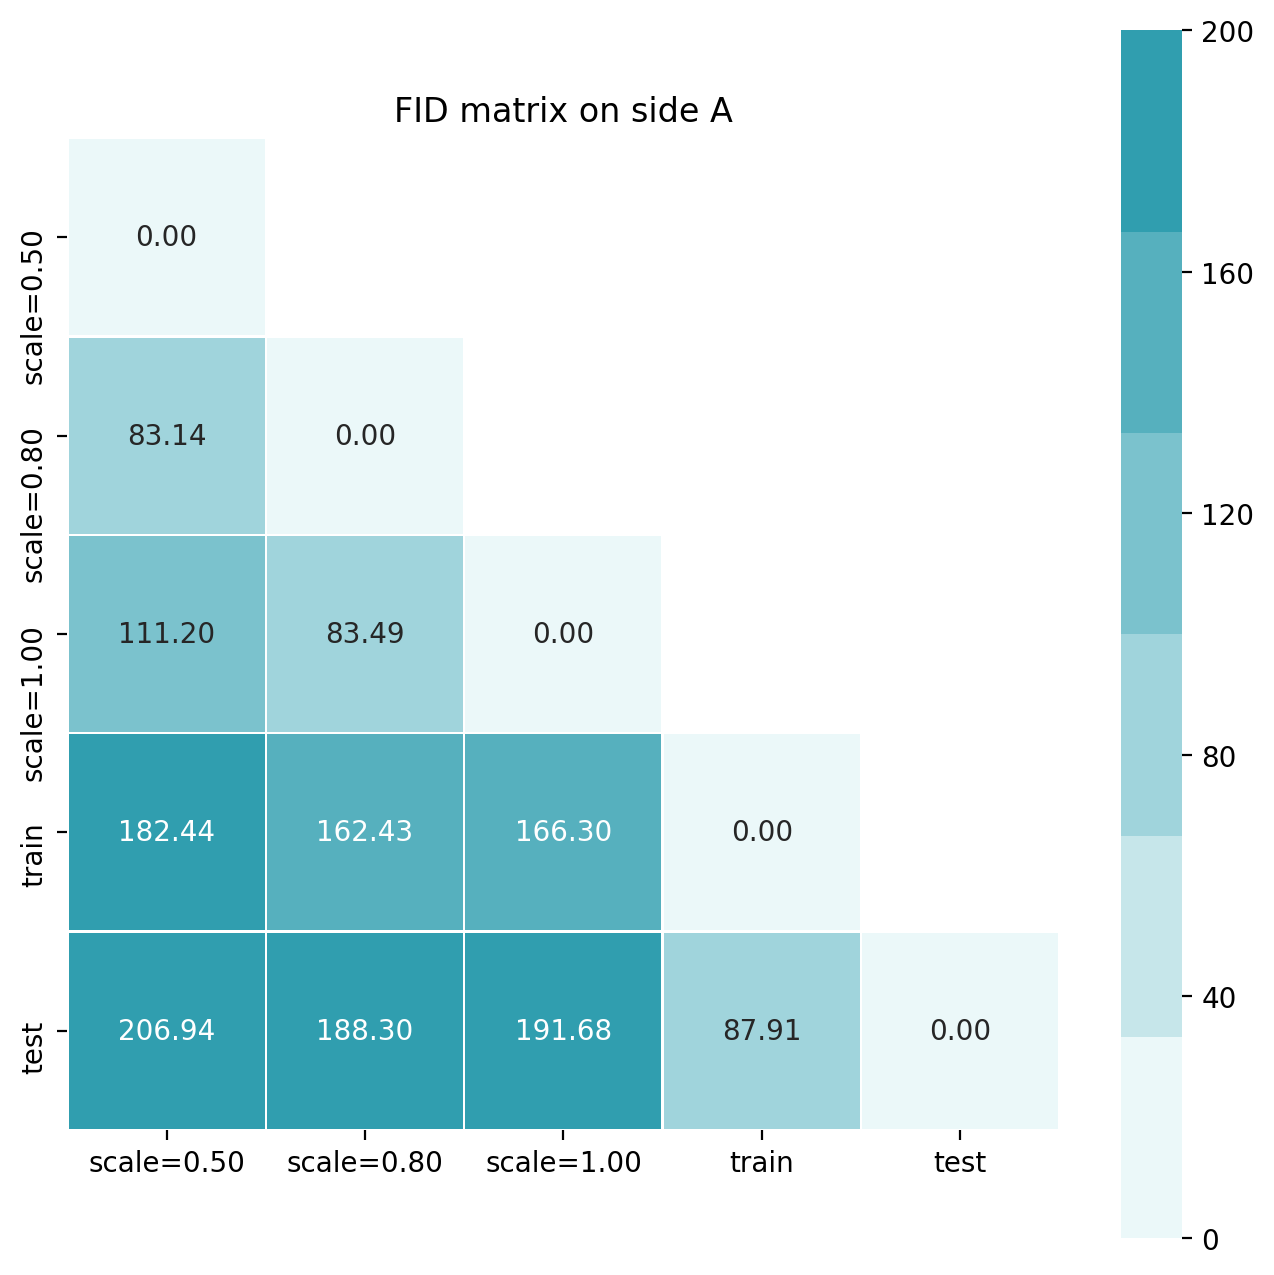

In [63]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


def plot_fid_heatmap(run_id, side):
    tsv_path = f'model/output/{run_id}/fid_{side}.tsv'
    fid_df = pd.read_csv(tsv_path, delimiter='\t', index_col=0)
    print(fid_df)

    mask = np.zeros_like(fid_df)
    mask[np.triu_indices_from(mask, k=1)] = True

    plt.figure(figsize=(8, 8), dpi=200)
    ax = sns.heatmap(
        fid_df,
        mask=mask,
        vmin=0,
        vmax=200,
        annot=True,
        linewidths=.5,
        square=True,
        fmt='.2f',
        cmap=sns.light_palette((210, 90, 60), input="husl"),
#         cmap=sns.color_palette('Blues'),
    )
    ax.set_title(f'FID matrix on side {side}')
    plt.savefig(f'static/fid_matrix_{side}.png', bbox_inches='tight')
    

run_id = 'p80mask_horse2zebra_h128_nres=3_simpled'
side = 'A'
plot_fid_heatmap(run_id, side=side)

            scale=0.50  scale=0.80  scale=1.00       train        test
scale=0.50    0.000000  107.188997  122.119385  143.925053  150.327440
scale=0.80  107.188997    0.000000  103.686819   78.816522   84.826991
scale=1.00  122.119385  103.686819    0.000000  137.632456  146.142494
train       143.925053   78.816522  137.632456    0.000000   30.297537
test        150.327440   84.826991  146.142494   30.297537    0.000000


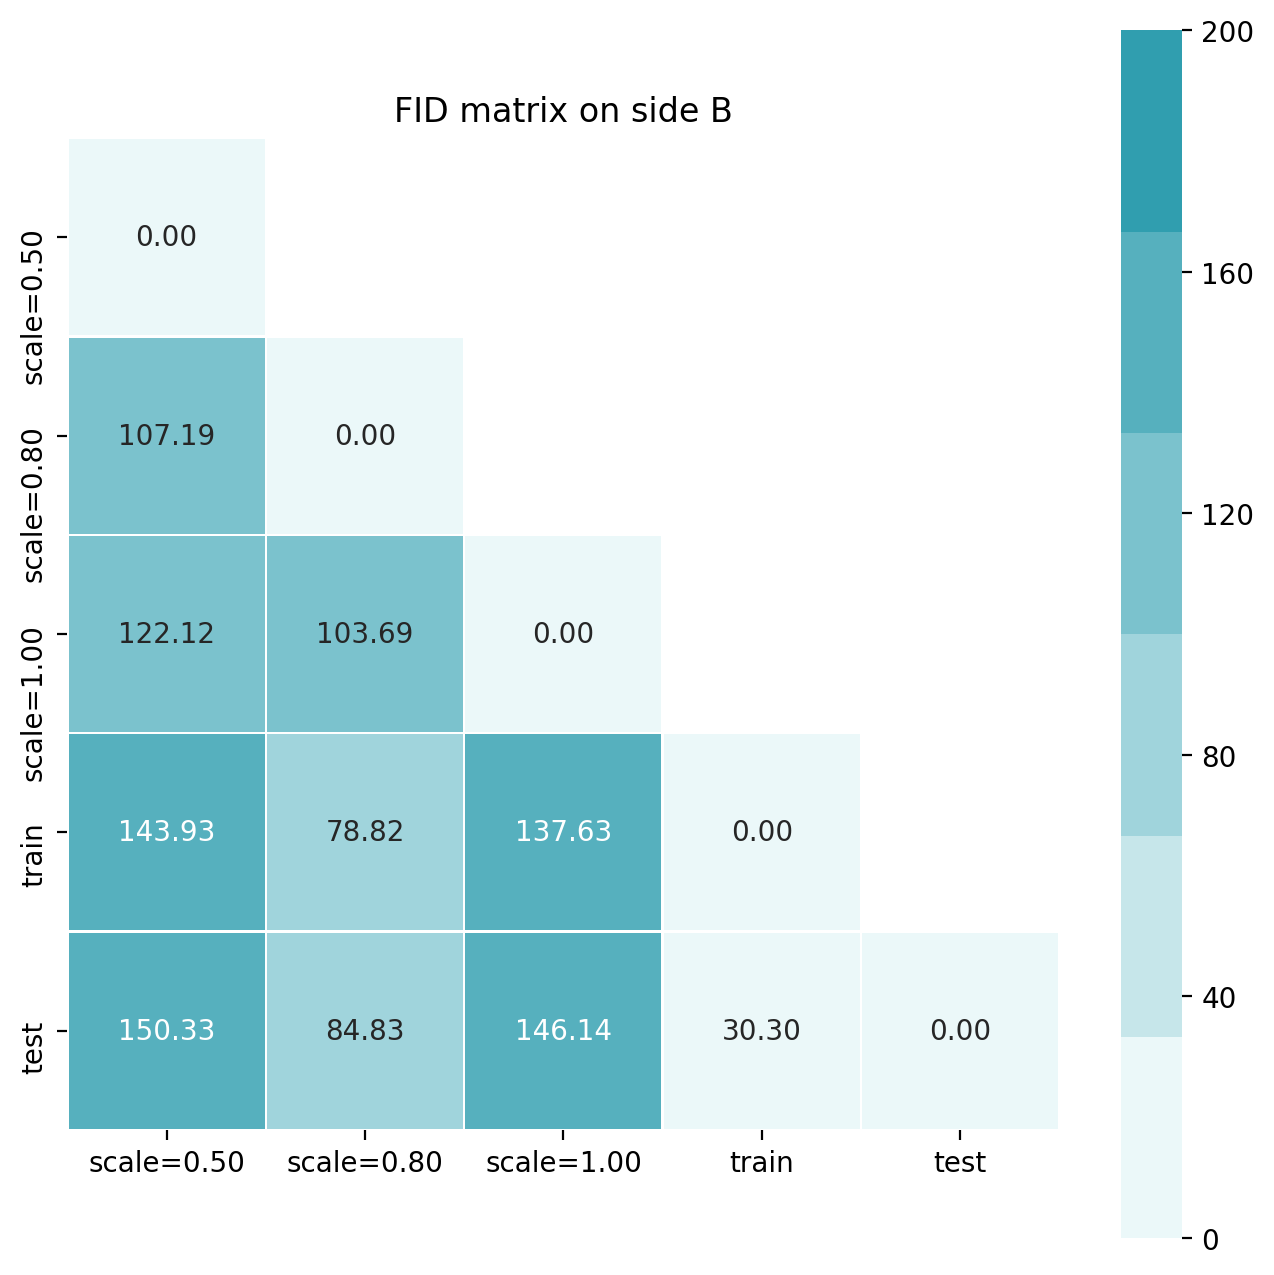

In [65]:
run_id = 'p80mask_horse2zebra_h128_nres=3_simpled'
side = 'B'

plot_fid_heatmap(run_id, side=side)

# Visualize masks for report

(-0.5, 127.5, 127.5, -0.5)

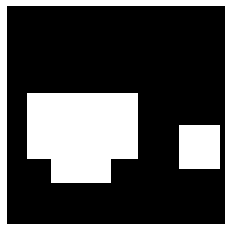

In [62]:
from model.utils import gen_random_mask
import matplotlib.pyplot as plt
import numpy as np

def with_border(img):
    H, W, C = img.shape
    out = np.full(shape=(H + 2, W + 2, C), fill_value=0.5)
    out[1:-1, 1:-1, :] = img
    return out


scales = []

mask = gen_random_mask(scales=scales, shape=[1, 3, 128, 128])
mask_img = mask.squeeze(dim=0).permute(1, 2, 0)  # (H, W, C)
ax_img = plt.imshow(mask_img)

ax = ax_img.axes
ax.axis('off')

# gen_random_mask

In [154]:
import random

random.uniform()

1

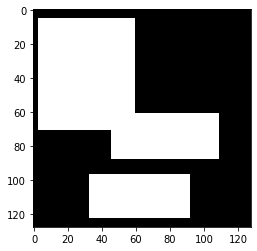

In [871]:
from model.utils import gen_random_mask
import matplotlib.pyplot as plt

# scales = [0.5]
scales = []

mask = utils.gen_random_mask(scales=scales, shape=[1, 3, 128, 128])
plt.imshow(mask.squeeze(dim=0).permute(1, 2, 0))

In [874]:
# rand_masks = [
#     utils.gen_random_mask(scales=scales, shape=[1, 3, 128, 128])
#     for _ in range(3)
# ]

masks = [
    utils.gen_random_mask(scales=scales, shape=[1, 3, 128, 128])
    for scales in ['0.5', '0.8', '1.0']
]
masks += rand_masks[:5]

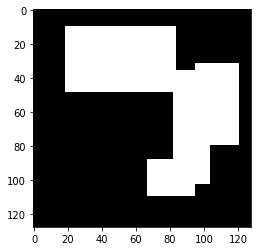

In [854]:
# masks = [
#     utils.gen_random_mask(scales=scales, shape=[1, 3, 128, 128])
#     for _ in range(4)
# ]

# masks = []
# masks.append(mask)


# for mask in masks:
#     plt.imshow(mask.squeeze(dim=0).permute(1, 2, 0))


plt.imshow(mask2HWC(rand_masks[3]))

# generate image using mask

In [79]:
import model.test as test_utils
import img_utils

RUN_IDS = [
    'mask_horse2zebra_h128_nres=3_simpled',
    'p80mask_horse2zebra_h128_nres=3_simpled',
]

RUN_INFOS = [
    # (run_id, side, file_name, left, right)
    # side: 0 -> a2b, 1 -> b2a.
    ('mask_horse2zebra_h128_nres=3_simpled', 0, 'n02381460_120.jpg', 'horse', 'zebra'),
    ('mask_horse2zebra_h128_nres=3_simpled', 1, 'n02391049_1880.jpg', 'horse', 'zebra'),
    ('mask_monet2photo_h128_nres=3_simpled', 0, '00170.jpg', 'monet', 'photo'),
    ('mask_monet2photo_h128_nres=3_simpled', 1, '2014-08-07 21:31:39.jpg', 'monet', 'photo'),
    ('mask_vangogh2photo_h128_nres=3_simpled', 0, '00023.jpg', 'vangogh', 'photo'),
    ('mask_vangogh2photo_h128_nres=3_simpled', 1, '2014-08-17 06:56:10.jpg', 'vangogh', 'photo'),
]


# run_id = RUN_IDS[0]
# nets = test_utils.create_default_nets(run_id)
# netG_A2B, netG_B2A = nets


# mask = masks[2]
# real = img_utils.path2Tensor('model/datasets/horse2zebra/test/A/n02381460_120.jpg')
# netG = netG_A2B


# fake = netG(real, mask=mask)
# fake = img_utils.tensor2image(fake)
# plt.imshow(fake.detach().squeeze(dim=0).permute(1, 2, 0))


def tensor2HWC(batch_img):
    if len(batch_img.shape) == 4:
        assert batch_img.size(0) == 1
        batch_img = batch_img.squeeze(dim=0)
    return img_utils.tensor2image(batch_img).detach().permute(1, 2, 0).clamp(0, 1)


def mask2HWC(mask):
    if len(mask.shape) == 4:
        assert mask.size(0) == 1
        mask = mask.squeeze(dim=0)
    return mask.permute(1, 2, 0)


def get_mask_names(masks):
    assert len(masks) >= 3
    names = [
        'scale=0.5',
        'scale=0.8',
        'scale=1.0 (CycleGAN)',
    ]
    return names + [f'rand{i+1}' for i in range(len(masks) - 3)]



def plot_grid(run_infos, masks, with_title=False):
    NUM_ROWS = 1 + len(run_infos)  # mask, *runs
    NUM_COLS = 1 + len(masks) # real, *masked_imags
    plt.axis('off')
    fig, ax_mat = plt.subplots(NUM_ROWS, NUM_COLS, sharex=True, sharey=True, figsize=(2 * NUM_COLS, 2 * (NUM_ROWS + 0.3)))

    if NUM_ROWS == 1:
        ax_mat = [ax_mat]  # Fix annoying inconsistency in matplotlib

    mask_names = get_mask_names(masks) if with_title else [''] * len(masks)

    ax_row_mask = ax_mat[0]
    for mask, ax_mask, mask_name in zip(masks, ax_row_mask[1:], mask_names):
        ax_mask.imshow(mask2HWC(mask))
        ax_mask.set_facecolor('xkcd:salmon')
        ax_mask.set_title(mask_name)


    for run_info, ax_row in zip(run_infos, ax_mat[1:]):
        ax_real, axs_fake = ax_row[0], ax_row[1:]
        run_id, side, file_name, left, right = run_info
        assert side in [0, 1]

        nets = test_utils.create_default_nets(run_id)
        netG = nets[side]

        source = 'A' if side == 0 else 'B'
        real = img_utils.path2Tensor(f'model/datasets/{left}2{right}/test/{source}/{file_name}')
        ax_real.imshow(tensor2HWC(real))
        title = f'{left} -> {right}' if side == 0 else f'{right} -> {left}'
        ax_real.set_title(title)

        for mask, ax_fake in zip(masks, axs_fake):
            fake = netG(real, mask=mask)
            ax_fake.imshow(tensor2HWC(fake))
            ax_fake.set_facecolor('xkcd:salmon')


    # Turn off axes
    for ax_row in ax_mat:
        for ax in ax_row:
            ax.axis('off')

    # plt.subplots_adjust(hspace=0, bottom=0, top=0)
    fig.tight_layout(h_pad=1, w_pad=1, pad=0)

# Inference on round mask

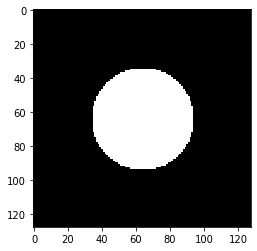

In [77]:
import numpy as np
import torch


def mask2HWC(mask):
    if len(mask.shape) == 4:
        assert mask.size(0) == 1
        mask = mask.squeeze(dim=0)
    return mask.permute(1, 2, 0)


def make_round_mask(radius):
    H, W = 128, 128
    c = H // 2  # center
    assert H == W

    mask = torch.zeros(1, 3, H, W)

    for i in range(H):
        for j in range(W):
            distance = np.sqrt((i - c) ** 2 + (j - c) ** 2)
            if distance < radius:
                mask[:, :, i, j] = 1.0
    return mask

plt.imshow(mask2HWC(make_round_mask(30)))

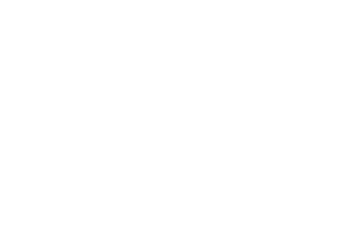

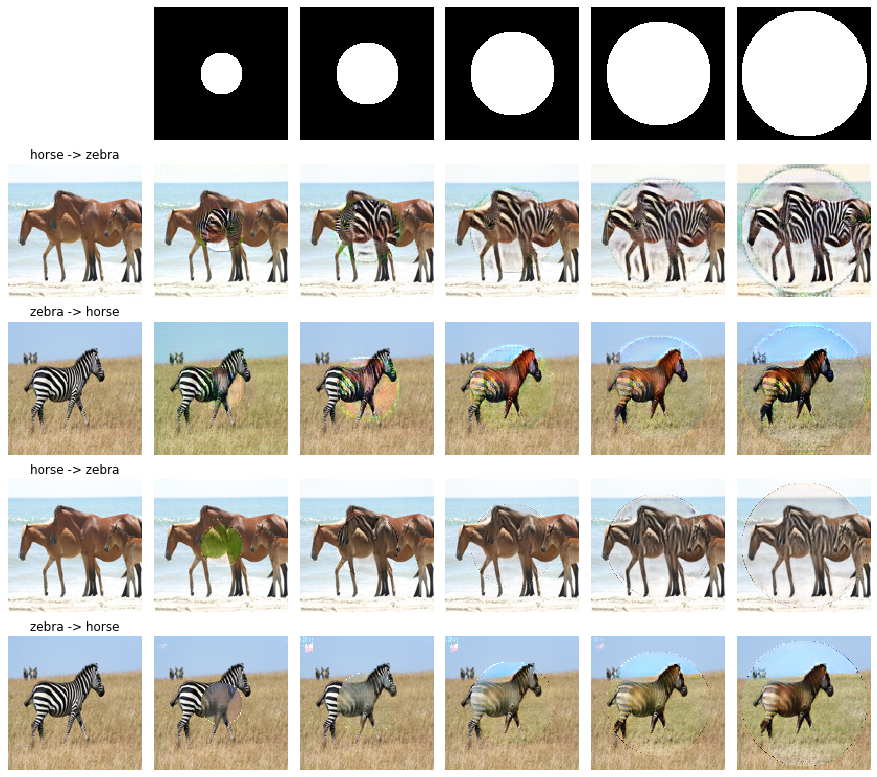

In [82]:
masks = [
    make_round_mask(20),
    make_round_mask(30),
    make_round_mask(40),
    make_round_mask(50),
    make_round_mask(60),
]
run_infos = [
    # (run_id, side, file_name, left, right)
    # side: 0 -> a2b, 1 -> b2a.
    ('mask_horse2zebra_h128_nres=3_simpled', 0, 'n02381460_120.jpg', 'horse', 'zebra'),
    ('mask_horse2zebra_h128_nres=3_simpled', 1, 'n02391049_1880.jpg', 'horse', 'zebra'),
    ('p80mask_horse2zebra_h128_nres=3_simpled', 0, 'n02381460_120.jpg', 'horse', 'zebra'),
    ('p80mask_horse2zebra_h128_nres=3_simpled', 1, 'n02391049_1880.jpg', 'horse', 'zebra'),
]

plot_grid(run_infos, masks)